# The Second Part of the Assignment of IDS 2020-2021
In this Jupyter notebook, please, document your results and the way you have obtained them. Please use the _Python environment_ provided at the beginning of the course. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupyter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

It is not needed that the group members be the same as the group members of the first part of the assignment, <font color="red"> *Please make sure to include names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student's matriculation number is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the datasets. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification and simplification. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment might take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

In [1]:
# importing the required libraries
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules as arule
from mlxtend.frequent_patterns import fpgrowth
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import gensim
from gensim.models import Doc2Vec
from sklearn import preprocessing
import multiprocessing
from tqdm import tqdm
from nltk.stem.snowball import SnowballStemmer
from sklearn import utils
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import sent_tokenize
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.log.util import interval_lifecycle
from nltk.lm import Vocabulary
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils

## Question 1 - Data Preprocessing and Data Quality (15 points)

(a) Carry out the following preprocessing steps before starting the analysis:

Select 90% of dataset <b>dataPrepViz.csv</b> for this assignment by random sampling. Use the matriculation number of one of the group members as seed. Rename the sampled dataset to <b>dataPrepViz_sampled</b> and export it as CSV.

 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your results in Moodle.

Use this dataset <b>dataPrepViz_sampled</b> as starting point for Question 1 and Question 2. Then apply further modifications as specified in the those questions.

In [2]:
dataPrepViz = pd.read_csv('Datasets/DataPrepViz.csv', sep=';')
# setting the seed for the Random State
random_state = np.random.seed(seed=123456)
# return a fraction of 90% percent of the data into "dataPrepViz_sampled"
dataPrepViz_sampled = dataPrepViz.sample(frac=0.9, random_state=random_state)

dataPrepViz_sampled.head(10)

geographic_group       country  children_per_woman_total_fertility  \
120              NaN     Sri Lanka                                2.06   
49            Europe        Greece                                1.31   
26               NaN       Comoros                                4.45   
113              NaN  Sierra Leone                                4.56   
85   Western Pacific      Mongolia                              -10.00   
89               NaN       Myanmar                                2.23   
20               NaN      Cameroon                              -10.00   
136              NaN    Uzbekistan                                2.31   
122           Europe   Switzerland                                1.54   
44            Africa         Gabon                                3.85   

     child_mortality_0_5_year_olds_dying_per_1000_born  \
120                                               8.75   
49                                                4.58   
26                                               74.90   
113                                             122.00   
85                                               18.60   
89                                               51.60   
20                                               85.80   
136                                              25.90   
122                                               4.32   
44                                               51.00   

     co2_emissions_tonnes_per_person  corruption_perception_index_cpi  \
120                            0.949                             37.0   
49                             7.040                             46.0   
26                             0.217                             26.0   
113                            0.126                             29.0   
85                             7.760                             39.0   
89                             0.421                             22.0   
20                             0.333                             27.0   
136                            3.310                             19.0   
122                            4.670                             86.0   
44                             2.690                             34.0   

     life_expectancy_years  vccin_effect_dag  
120                   76.9               NaN  
49                    80.8             0.169  
26                    68.0               NaN  
113                   58.5               NaN  
85                    68.6             0.066  
89                    67.8               NaN  
20                    61.2               NaN  
136                   69.9               NaN  
122                   83.5               NaN  
44                    67.0               NaN

Create new dataset <b>data1</b> by removing the feature 'geographic_group' from <b>dataPrepViz_sampled</b>. Use this <b>data1</b> dataset for Question 1.

In [3]:
data1 = dataPrepViz_sampled.drop('geographic_group', axis=1)
data1.head(10)

country  children_per_woman_total_fertility  \
120     Sri Lanka                                2.06   
49         Greece                                1.31   
26        Comoros                                4.45   
113  Sierra Leone                                4.56   
85       Mongolia                              -10.00   
89        Myanmar                                2.23   
20       Cameroon                              -10.00   
136    Uzbekistan                                2.31   
122   Switzerland                                1.54   
44          Gabon                                3.85   

     child_mortality_0_5_year_olds_dying_per_1000_born  \
120                                               8.75   
49                                                4.58   
26                                               74.90   
113                                             122.00   
85                                               18.60   
89                                               51.60   
20                                               85.80   
136                                              25.90   
122                                               4.32   
44                                               51.00   

     co2_emissions_tonnes_per_person  corruption_perception_index_cpi  \
120                            0.949                             37.0   
49                             7.040                             46.0   
26                             0.217                             26.0   
113                            0.126                             29.0   
85                             7.760                             39.0   
89                             0.421                             22.0   
20                             0.333                             27.0   
136                            3.310                             19.0   
122                            4.670                             86.0   
44                             2.690                             34.0   

     life_expectancy_years  vccin_effect_dag  
120                   76.9               NaN  
49                    80.8             0.169  
26                    68.0               NaN  
113                   58.5               NaN  
85                    68.6             0.066  
89                    67.8               NaN  
20                    61.2               NaN  
136                   69.9               NaN  
122                   83.5               NaN  
44                    67.0               NaN

(b) We want to get a first impression of the data. To achieve this, compute and show the following:

- the column names (the names of the features)
- the data type of each feature
- for categorical features: the number of classes and the value of the most frequent class
- for numerical features: the mean, standard deviation, minimum and maximum

In [4]:
print("============== The column names and its data type: ==============")
print(data1.dtypes)

print("\n====================== Categorical features =====================")
print("Categorical features: country")
print("The number of country:" + str(len(set(data1["country"]))))
print("Number of items: " + str(len(data1)))
#print("The value of the most frequent country: " + str(max(set(data1["country"]), key = data1["country"].tolist().count)))
print("No most frequent country, because every country only appear once.")

print("\n======================= Numerical features ======================")
print("""Numerical features: children_per_woman_total_fertility, child_mortality_0_5_year_olds_dying_per_1000_born, 
co2_emissions_tonnes_per_person, corruption_perception_index_cpi, life_expectancy_years, vccin_effect_dag""")
pd.DataFrame(columns=['numerical features', 'mean', 'standard deviation', 'minimum', 'maximum'],
             data=[
    [
        "children_per_woman_total_fertility",
        data1['children_per_woman_total_fertility'].mean(),
        data1['children_per_woman_total_fertility'].std(),
        data1['children_per_woman_total_fertility'].min(),
        data1['children_per_woman_total_fertility'].max()
    ],
    [
        "child_mortality_0_5_year_olds_dying_per_1000_born",
        data1['child_mortality_0_5_year_olds_dying_per_1000_born'].mean(
        ),
        data1['child_mortality_0_5_year_olds_dying_per_1000_born'].std(
        ),
        data1['child_mortality_0_5_year_olds_dying_per_1000_born'].min(
        ),
        data1['child_mortality_0_5_year_olds_dying_per_1000_born'].max(
        )
    ],
    [
        "co2_emissions_tonnes_per_person",
        data1['co2_emissions_tonnes_per_person'].mean(),
        data1['co2_emissions_tonnes_per_person'].std(),
        data1['co2_emissions_tonnes_per_person'].min(),
        data1['children_per_woman_total_fertility'].max()
    ],
    [
        "corruption_perception_index_cpi",
        data1['corruption_perception_index_cpi'].mean(),
        data1['corruption_perception_index_cpi'].std(),
        data1['corruption_perception_index_cpi'].min(),
        data1['corruption_perception_index_cpi'].max()
    ],
    [
        "life_expectancy_years",
        data1['life_expectancy_years'].mean(),
        data1['life_expectancy_years'].std(),
        data1['life_expectancy_years'].min(),
        data1['life_expectancy_years'].max()
    ],
    [
        "vccin_effect_dag",
        data1['vccin_effect_dag'].mean(),
        data1['vccin_effect_dag'].std(),
        data1['vccin_effect_dag'].min(),
        data1['vccin_effect_dag'].max()
    ],
]).set_index('numerical features')

============== The column names and its data type: ==============
country                                               object
children_per_woman_total_fertility                   float64
child_mortality_0_5_year_olds_dying_per_1000_born    float64
co2_emissions_tonnes_per_person                      float64
corruption_perception_index_cpi                      float64
life_expectancy_years                                float64
vccin_effect_dag                                     float64
dtype: object

====================== Categorical features =====================
Categorical features: country
The number of country:126
Number of items: 126
No most frequent country, because every country only appear once.

======================= Numerical features ======================
Numerical features: children_per_woman_total_fertility, child_mortality_0_5_year_olds_dying_per_1000_born, 
co2_emissions_tonnes_per_person, corruption_perception_index_cpi, life_expectancy_years, vccin_effect_dag


mean  \
numerical features                                             
children_per_woman_total_fertility                 -0.285714   
child_mortality_0_5_year_olds_dying_per_1000_born  30.652937   
co2_emissions_tonnes_per_person                     4.198041   
corruption_perception_index_cpi                    43.968254   
life_expectancy_years                              72.824603   
vccin_effect_dag                                    0.082879   

                                                   standard deviation  \
numerical features                                                      
children_per_woman_total_fertility                           5.717017   
child_mortality_0_5_year_olds_dying_per_1000_born           31.987589   
co2_emissions_tonnes_per_person                              4.728252   
corruption_perception_index_cpi                             19.732992   
life_expectancy_years                                        7.399607   
vccin_effect_dag                                             0.049995   

                                                   minimum  maximum  
numerical features                                                   
children_per_woman_total_fertility                -10.0000     7.29  
child_mortality_0_5_year_olds_dying_per_1000_born   2.1800   130.00  
co2_emissions_tonnes_per_person                     0.0367     7.29  
corruption_perception_index_cpi                    11.0000    91.00  
life_expectancy_years                              56.2000    84.40  
vccin_effect_dag                                    0.0000     0.26

(c) For each feature, provide a histogram (with at least 10 bins each) showing the value distribution. Can you spot any obvious data quality issues, e.g. inconsistencies, implausible values or missing values (without researching on specific domain knowledge)?

Briefly explain the issues you identified.

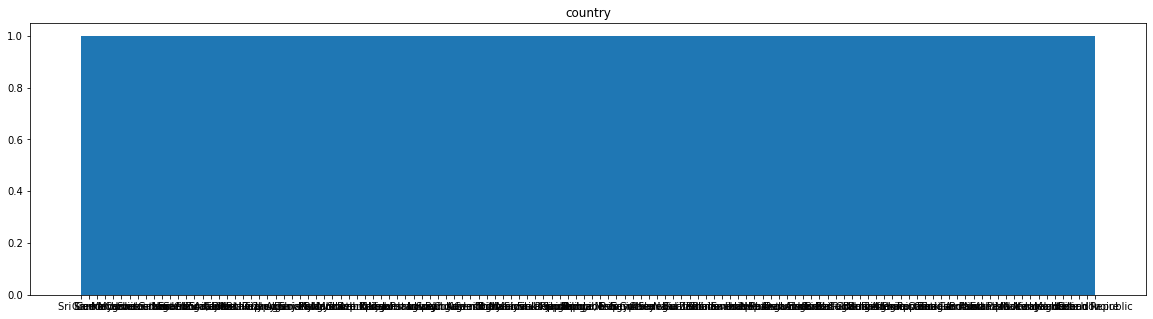

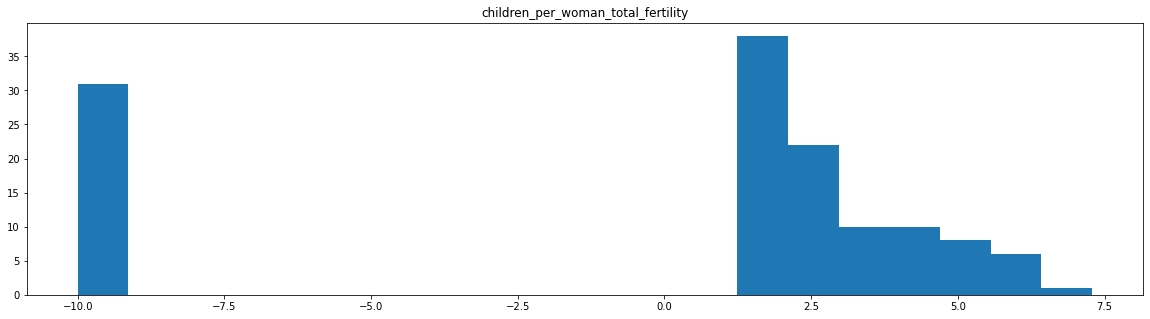

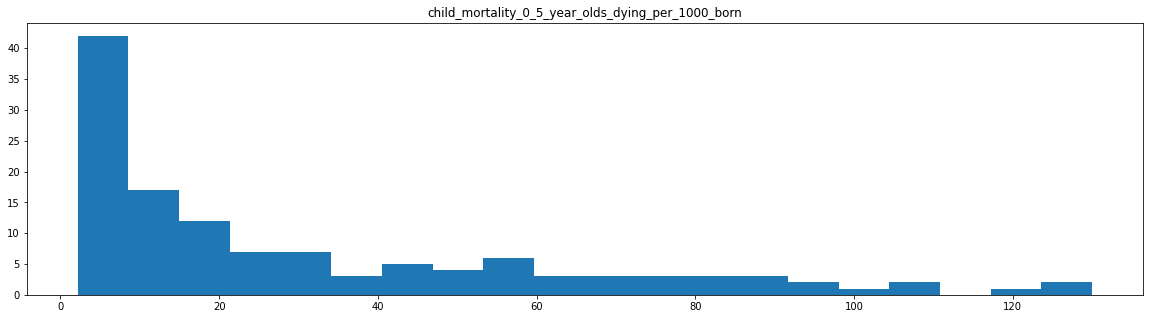

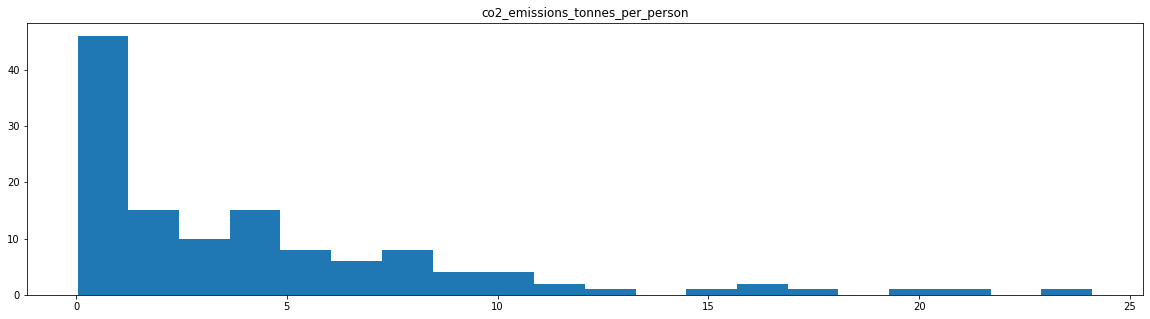

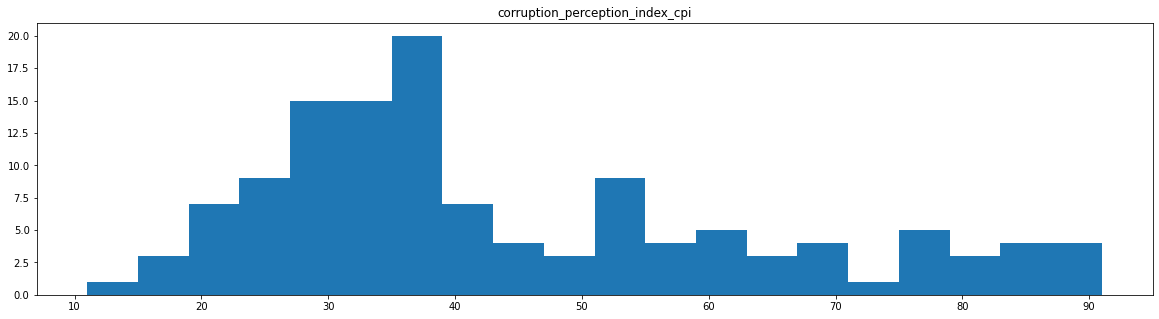

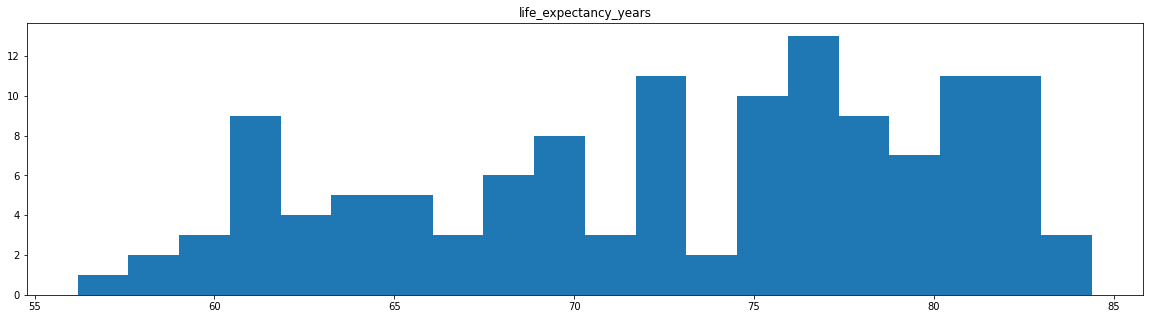

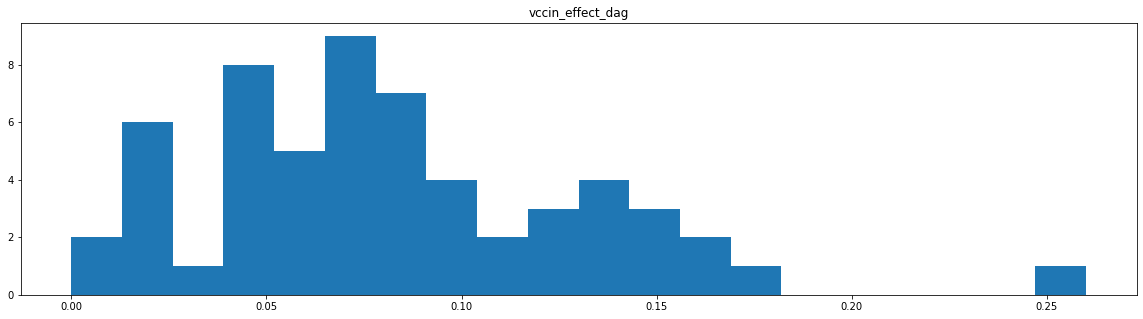

In [5]:
plt.figure(figsize=(20, 5))
plt.hist(data1['country'], bins=data1['country'].count())
plt.title("country")
plt.show()

plt.figure(figsize=(20, 5))
plt.hist(data1['children_per_woman_total_fertility'], bins=20)
plt.title("children_per_woman_total_fertility")
plt.show()

plt.figure(figsize=(20, 5))
plt.hist(data1['child_mortality_0_5_year_olds_dying_per_1000_born'], bins=20)
plt.title("child_mortality_0_5_year_olds_dying_per_1000_born")
plt.show()

plt.figure(figsize=(20, 5))
plt.hist(data1['co2_emissions_tonnes_per_person'], bins=20)
plt.title("co2_emissions_tonnes_per_person")
plt.show()

plt.figure(figsize=(20, 5))
plt.hist(data1['corruption_perception_index_cpi'], bins=20)
plt.title("corruption_perception_index_cpi")
plt.show()

plt.figure(figsize=(20, 5))
plt.hist(data1['life_expectancy_years'], bins=20)
plt.title("life_expectancy_years")
plt.show()

plt.figure(figsize=(20, 5))
plt.hist(data1['vccin_effect_dag'], bins=20)
plt.title("vccin_effect_dag")
plt.show()

Explanation: 

The feature "children_per_woman_total_fertility" should be not less than 0, because it means 

the average number of children per woman.

There are many NaN values in feature "vccin_effect_dag".

(d) Substitute all implausible values as missing data (numpy.nan). Show the scatter matrix of the resulting dataset.

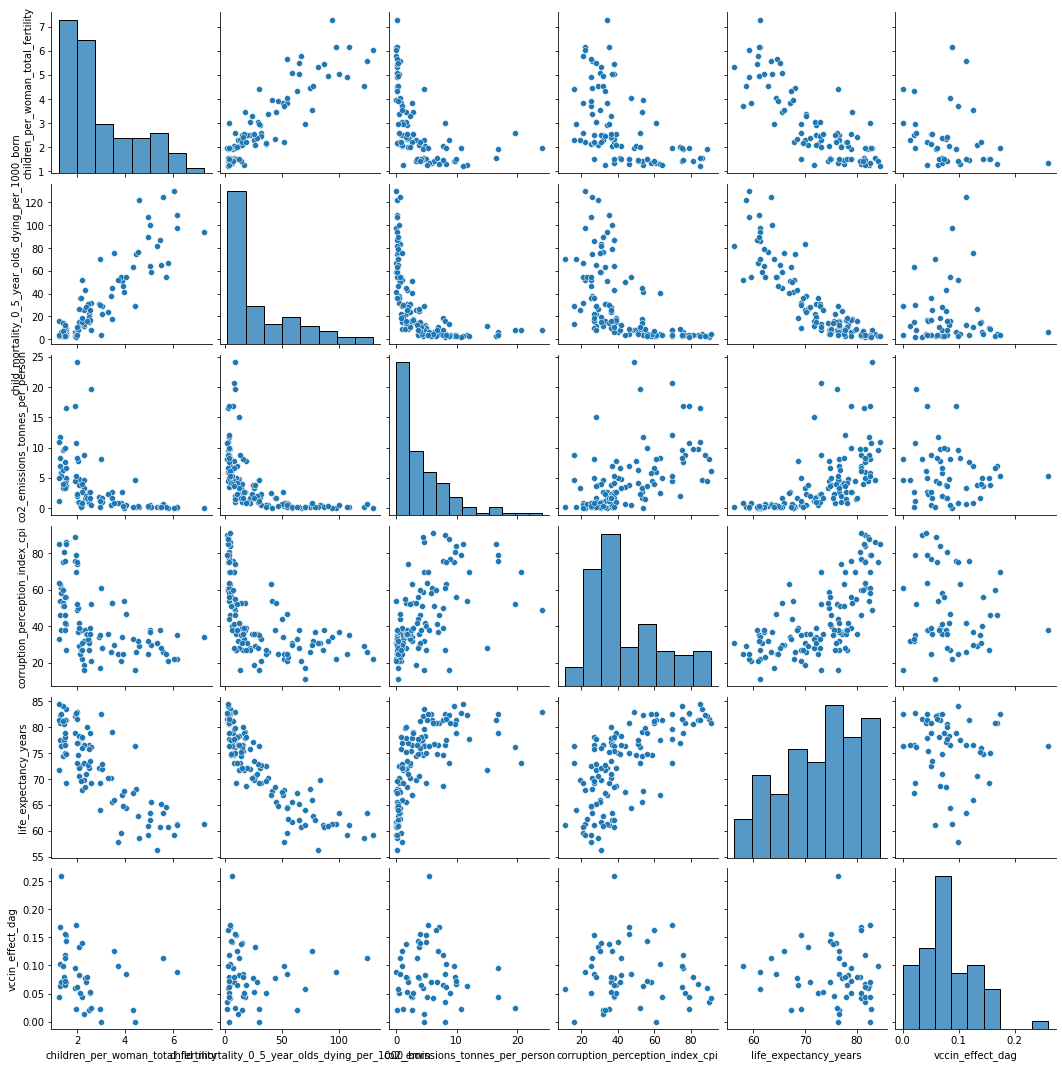

In [6]:
data1["children_per_woman_total_fertility"].replace({-10: np.nan}, inplace=True)
sns.pairplot(data1)

(e) We need to handle any implausible or missing data. In the lecture, several strategies to do so have been introduced. 

In this question, consider implausible values to be the ones identified in part (c).

    1) For all numerical features, compute and show mean, standard deviation, minimum and maximum, while ignoring the missing and implausible values. Also, print the total number of data rows.
    
    2) Based on the information obtained in the previous subtasks of this question, choose a strategy for handling all missing/implausible values, such that
    - for one feature, you delete all data rows that include a missing value.
    - for one feature, you replace all missing values by the median value.
    - for one feature, you impute the values based on other, continous features using a regression classifier.
    Create a cleaned dataset with all those values handled accordingly. 
    
    3) For all numerical features, compute and show mean, standard deviation, minimum and maximum with respect to your cleaned dataset. Also print the total number of data rows.
    
    4) Motivate and explain the choices you made in 2). Compare the computed statistical values before and after cleaning and briefly describe and evaluate any changes.
 
*Hint: There might not be an obvious choice for the best strategy. In this case, sound reasoning based on correct observations is more important than the decision itself.*

In [7]:
# For all numerical features, compute and show mean, standard deviation, minimum and maximum, 
# while ignoring the missing and implausible values.
pd.DataFrame(columns=['numerical features', 'mean', 'standard deviation', 'minimum', 'maximum'],
             data=[
    [
        "children_per_woman_total_fertility",
        data1['children_per_woman_total_fertility'].mean(),
        data1['children_per_woman_total_fertility'].std(),
        data1['children_per_woman_total_fertility'].min(),
        data1['children_per_woman_total_fertility'].max()
    ],
    [
        "child_mortality_0_5_year_olds_dying_per_1000_born",
        data1['child_mortality_0_5_year_olds_dying_per_1000_born'].mean(
        ),
        data1['child_mortality_0_5_year_olds_dying_per_1000_born'].std(
        ),
        data1['child_mortality_0_5_year_olds_dying_per_1000_born'].min(
        ),
        data1['child_mortality_0_5_year_olds_dying_per_1000_born'].max(
        )
    ],
    [
        "co2_emissions_tonnes_per_person",
        data1['co2_emissions_tonnes_per_person'].mean(),
        data1['co2_emissions_tonnes_per_person'].std(),
        data1['co2_emissions_tonnes_per_person'].min(),
        data1['co2_emissions_tonnes_per_person'].max()
    ],
    [
        "corruption_perception_index_cpi",
        data1['corruption_perception_index_cpi'].mean(),
        data1['corruption_perception_index_cpi'].std(),
        data1['corruption_perception_index_cpi'].min(),
        data1['corruption_perception_index_cpi'].max()
    ],
    [
        "life_expectancy_years",
        data1['life_expectancy_years'].mean(),
        data1['life_expectancy_years'].std(),
        data1['life_expectancy_years'].min(),
        data1['life_expectancy_years'].max()
    ],
    [
        "vccin_effect_dag",
        data1['vccin_effect_dag'].mean(),
        data1['vccin_effect_dag'].std(),
        data1['vccin_effect_dag'].min(),
        data1['vccin_effect_dag'].max()
    ],
]).set_index('numerical features')

mean  \
numerical features                                             
children_per_woman_total_fertility                  2.884211   
child_mortality_0_5_year_olds_dying_per_1000_born  30.652937   
co2_emissions_tonnes_per_person                     4.198041   
corruption_perception_index_cpi                    43.968254   
life_expectancy_years                              72.824603   
vccin_effect_dag                                    0.082879   

                                                   standard deviation  \
numerical features                                                      
children_per_woman_total_fertility                           1.478743   
child_mortality_0_5_year_olds_dying_per_1000_born           31.987589   
co2_emissions_tonnes_per_person                              4.728252   
corruption_perception_index_cpi                             19.732992   
life_expectancy_years                                        7.399607   
vccin_effect_dag                                             0.049995   

                                                   minimum  maximum  
numerical features                                                   
children_per_woman_total_fertility                  1.2400     7.29  
child_mortality_0_5_year_olds_dying_per_1000_born   2.1800   130.00  
co2_emissions_tonnes_per_person                     0.0367    24.10  
corruption_perception_index_cpi                    11.0000    91.00  
life_expectancy_years                              56.2000    84.40  
vccin_effect_dag                                    0.0000     0.26

In [8]:
# print the total number of data rows.
print("The total number of data rows: " + str(len(data1)))

The total number of data rows: 126


According to above informations, we need to handle all missing/implausible values in feature children_per_woman_total_fertility and vccin_effect_dag.

In [9]:
# handle NaN values in c
# The values of the feature may be related to other features. 
# It will lose correlations if we replace all missing values by the median value.
# According to the scatter matrix we can know that there are some features correlated to children_per_woman_total_fertility
# We only have 126 items; it is a kind of small data set.
# We should not delete data if we have a better way to fill missing values because we have only 124 data, and the deletion might make the data set unusable or create a bias.
# First, we try using linear regression for simplicity. If it has high accuracy, we do not need to consider non-linear one.
print("Correlation:")
print("child_mortality_0_5_year_olds_dying_per_1000_born: ", data1['children_per_woman_total_fertility'].corr(
    data1['child_mortality_0_5_year_olds_dying_per_1000_born']))
print("co2_emissions_tonnes_per_person: ", data1['children_per_woman_total_fertility'].corr(
    data1['co2_emissions_tonnes_per_person']))
print("corruption_perception_index_cpi: ", data1['children_per_woman_total_fertility'].corr(
    data1['corruption_perception_index_cpi']))
print("life_expectancy_years: ", data1['children_per_woman_total_fertility'].corr(
    data1['life_expectancy_years']))
print("vccin_effect_dag: ", data1['children_per_woman_total_fertility'].corr(
    data1['vccin_effect_dag']))

Correlation:
child_mortality_0_5_year_olds_dying_per_1000_born:  0.889405592893968
co2_emissions_tonnes_per_person:  -0.5154955802614269
corruption_perception_index_cpi:  -0.512293983294427
life_expectancy_years:  -0.8170006518422843
vccin_effect_dag:  -0.2535019921832457


In [10]:
# the features 'child_mortality_0_5_year_olds_dying_per_1000_born' and 'life_expectancy_years' are highly correlated to the feature children_per_woman_total_fertility 
# we use these two features to predict 'children_per_woman_total_fertility'
# create a linear regression model
model1 = LinearRegression()

# create training data
data1_train = data1[data1['children_per_woman_total_fertility']>0]
X_train = data1_train[['child_mortality_0_5_year_olds_dying_per_1000_born', 'life_expectancy_years']]
y_train = data1_train['children_per_woman_total_fertility']
model1.fit(X_train, y_train)

# now we test the accuracy for training data
model1.score(X_train, y_train)

0.7962695230414187

In [11]:
# It seems to have an appropriate accuracy for the training dataset, so we use this model to predict values
data1_test = data1[data1['children_per_woman_total_fertility'].isnull()]
X_test = data1_test[['child_mortality_0_5_year_olds_dying_per_1000_born', 'life_expectancy_years']]
y_test = model1.predict(X_test)

# Create a copy of the data
cleaned_dataset = data1

y_test_index=0
for index, row in data1.iterrows():
    if pd.isna(row['children_per_woman_total_fertility']):
        cleaned_dataset.at[index, 'children_per_woman_total_fertility'] = y_test[y_test_index]
        y_test_index = y_test_index + 1
        
cleaned_dataset.head(20)

country  children_per_woman_total_fertility  \
120         Sri Lanka                            2.060000   
49             Greece                            1.310000   
26            Comoros                            4.450000   
113      Sierra Leone                            4.560000   
85           Mongolia                            2.511088   
89            Myanmar                            2.230000   
20           Cameroon                            4.992815   
136        Uzbekistan                            2.310000   
122       Switzerland                            1.540000   
44              Gabon                            3.850000   
58               Iran                            2.187540   
96            Nigeria                            5.590000   
36            Ecuador                            2.510000   
134     United States                            1.930000   
110      Saudi Arabia                            2.580000   
81         Mauritania                            4.655451   
139          Zimbabwe                            3.840000   
27   Congo, Dem. Rep.                            6.170000   
123        Tajikistan                            3.400000   
77             Malawi                            4.083059   

     child_mortality_0_5_year_olds_dying_per_1000_born  \
120                                               8.75   
49                                                4.58   
26                                               74.90   
113                                             122.00   
85                                               18.60   
89                                               51.60   
20                                               85.80   
136                                              25.90   
122                                               4.32   
44                                               51.00   
58                                               16.00   
96                                              125.00   
36                                               15.10   
134                                               6.80   
110                                               8.54   
81                                               83.50   
139                                              54.30   
27                                               97.40   
123                                              37.90   
77                                               59.20   

     co2_emissions_tonnes_per_person  corruption_perception_index_cpi  \
120                           0.9490                             37.0   
49                            7.0400                             46.0   
26                            0.2170                             26.0   
113                           0.1260                             29.0   
85                            7.7600                             39.0   
89                            0.4210                             22.0   
20                            0.3330                             27.0   
136                           3.3100                             19.0   
122                           4.6700                             86.0   
44                            2.6900                             34.0   
58                            8.1700                             27.0   
96                            0.6270                             26.0   
36                            2.6300                             32.0   
134                          16.9000                             76.0   
110                          19.6000                             52.0   
81                            0.6090                             31.0   
139                           0.8810                             21.0   
27                            0.0367                             22.0   
123                           0.5740                             26.0   
77                            0.0669                 

In [12]:
# Handle NaN values in feature vccin_effect_dag
# According to the scatter matrix we can know that there are no features correlated to vccin_effect_dag
# According to the histogram, all values by feature "vccin_effect_dag" are very low
# and almost all of them in the range (0, 0.2)
# So we can fill them with the median
# We should not delete data if we have a better way to fill missing values.
# If we drop them, we will lose a large number of items,
# which might make the data set unusable or create a bias.
cleaned_dataset = cleaned_dataset.fillna(cleaned_dataset["vccin_effect_dag"].median())

cleaned_dataset.head(20)

country  children_per_woman_total_fertility  \
120         Sri Lanka                            2.060000   
49             Greece                            1.310000   
26            Comoros                            4.450000   
113      Sierra Leone                            4.560000   
85           Mongolia                            2.511088   
89            Myanmar                            2.230000   
20           Cameroon                            4.992815   
136        Uzbekistan                            2.310000   
122       Switzerland                            1.540000   
44              Gabon                            3.850000   
58               Iran                            2.187540   
96            Nigeria                            5.590000   
36            Ecuador                            2.510000   
134     United States                            1.930000   
110      Saudi Arabia                            2.580000   
81         Mauritania                            4.655451   
139          Zimbabwe                            3.840000   
27   Congo, Dem. Rep.                            6.170000   
123        Tajikistan                            3.400000   
77             Malawi                            4.083059   

     child_mortality_0_5_year_olds_dying_per_1000_born  \
120                                               8.75   
49                                                4.58   
26                                               74.90   
113                                             122.00   
85                                               18.60   
89                                               51.60   
20                                               85.80   
136                                              25.90   
122                                               4.32   
44                                               51.00   
58                                               16.00   
96                                              125.00   
36                                               15.10   
134                                               6.80   
110                                               8.54   
81                                               83.50   
139                                              54.30   
27                                               97.40   
123                                              37.90   
77                                               59.20   

     co2_emissions_tonnes_per_person  corruption_perception_index_cpi  \
120                           0.9490                             37.0   
49                            7.0400                             46.0   
26                            0.2170                             26.0   
113                           0.1260                             29.0   
85                            7.7600                             39.0   
89                            0.4210                             22.0   
20                            0.3330                             27.0   
136                           3.3100                             19.0   
122                           4.6700                             86.0   
44                            2.6900                             34.0   
58                            8.1700                             27.0   
96                            0.6270                             26.0   
36                            2.6300                             32.0   
134                          16.9000                             76.0   
110                          19.6000                             52.0   
81                            0.6090                             31.0   
139                           0.8810                             21.0   
27                            0.0367                             22.0   
123                           0.5740                             26.0   
77                            0.0669                 

In [13]:
# compute mean, standard deviation, minimum, maximum for numerical features in cleaned_dataset
pd.DataFrame(columns=['numerical features', 'mean', 'standard deviation', 'minimum', 'maximum'],
             data=[
    [
        "children_per_woman_total_fertility",
        cleaned_dataset['children_per_woman_total_fertility'].mean(
        ),
        cleaned_dataset['children_per_woman_total_fertility'].std(
        ),
        cleaned_dataset['children_per_woman_total_fertility'].min(
        ),
        cleaned_dataset['children_per_woman_total_fertility'].max(
        )
    ],
    [
        "child_mortality_0_5_year_olds_dying_per_1000_born",
        cleaned_dataset['child_mortality_0_5_year_olds_dying_per_1000_born'].mean(
        ),
        cleaned_dataset['child_mortality_0_5_year_olds_dying_per_1000_born'].std(
        ),
        cleaned_dataset['child_mortality_0_5_year_olds_dying_per_1000_born'].min(
        ),
        cleaned_dataset['child_mortality_0_5_year_olds_dying_per_1000_born'].max(
        )
    ],
    [
        "co2_emissions_tonnes_per_person",
        cleaned_dataset['co2_emissions_tonnes_per_person'].mean(
        ),
        cleaned_dataset['co2_emissions_tonnes_per_person'].std(
        ),
        cleaned_dataset['co2_emissions_tonnes_per_person'].min(
        ),
        cleaned_dataset['co2_emissions_tonnes_per_person'].max(
        )
    ],
    [
        "corruption_perception_index_cpi",
        cleaned_dataset['corruption_perception_index_cpi'].mean(
        ),
        cleaned_dataset['corruption_perception_index_cpi'].std(
        ),
        cleaned_dataset['corruption_perception_index_cpi'].min(
        ),
        cleaned_dataset['corruption_perception_index_cpi'].max(
        )
    ],
    [
        "life_expectancy_years",
        cleaned_dataset['life_expectancy_years'].mean(
        ),
        cleaned_dataset['life_expectancy_years'].std(
        ),
        cleaned_dataset['life_expectancy_years'].min(
        ),
        cleaned_dataset['life_expectancy_years'].max(
        )
    ],
    [
        "vccin_effect_dag",
        cleaned_dataset['vccin_effect_dag'].mean(),
        cleaned_dataset['vccin_effect_dag'].std(),
        cleaned_dataset['vccin_effect_dag'].min(),
        cleaned_dataset['vccin_effect_dag'].max()
    ],
]).set_index('numerical features')

mean  \
numerical features                                             
children_per_woman_total_fertility                  2.790296   
child_mortality_0_5_year_olds_dying_per_1000_born  30.652937   
co2_emissions_tonnes_per_person                     4.198041   
corruption_perception_index_cpi                    43.968254   
life_expectancy_years                              72.824603   
vccin_effect_dag                                    0.078897   

                                                   standard deviation  \
numerical features                                                      
children_per_woman_total_fertility                           1.399931   
child_mortality_0_5_year_olds_dying_per_1000_born           31.987589   
co2_emissions_tonnes_per_person                              4.728252   
corruption_perception_index_cpi                             19.732992   
life_expectancy_years                                        7.399607   
vccin_effect_dag                                             0.033962   

                                                   minimum  maximum  
numerical features                                                   
children_per_woman_total_fertility                  1.2400     7.29  
child_mortality_0_5_year_olds_dying_per_1000_born   2.1800   130.00  
co2_emissions_tonnes_per_person                     0.0367    24.10  
corruption_perception_index_cpi                    11.0000    91.00  
life_expectancy_years                              56.2000    84.40  
vccin_effect_dag                                    0.0000     0.26

Explanation:
Motivation and explanation of the choices we have made are given in the comment. To sum up:
- Because we have only 126 items, deleting the implausible or missing data should not be considered first, which might make the data set unusable or create a bias.
- Handling implausible and missing data in the feature "children_per_woman_total_fertility" using regression:
    - We consider handling these data using regression because we find some correlated features according to the scatter matrix.
    - First, we try using linear regression for simplicity. If it has high accuracy, we do not need to consider non-linear one.
    - The features 'child_mortality_0_5_year_olds_dying_per_1000_born' and 'life_expectancy_years' are highly correlated to the feature 'children_per_woman_total_fertility'. The regression classifier based on those two features has high accuracy on training data. So it is a suitable way to handle implausible and missing data.
- Handling implausible and missing data in the feature "vccin_effect_dag" by replacing all missing values by the median value:
    - According to the scatter matrix, we do not consider handling these data using regression because it is not highly correlated to other features.
    - According to the histogram, all values by feature "vccin_effect_dag" are very low and almost all of them in the range (0, 0.2), So we can fill them with median.
    
statistical values **before** cleaning:
    
|numerical features|mean|standard deviation|minimum|maximum|
| :-----| :----: | :----: |:----: |:----: |
|children_per_woman_total_fertility|<b>2.884211|<b>1.478743|1.2400|7.29|
|child_mortality_0_5_year_olds_dying_per_1000_born|	30.652937|	31.987589|	2.1800|	130.00|
|co2_emissions_tonnes_per_person	|4.198041	|4.728252	|0.0367	|24.10|
|corruption_perception_index_cpi	|43.968254	|19.732992	|11.0000	|91.00|
|life_expectancy_years|	72.824603	|7.399607	|56.2000	|84.40|
|vccin_effect_dag|<b>0.082879|<b>0.049995|0.0000|0.26|

statistical values **after** cleaning:

|numerical features|mean|standard deviation|minimum|maximum|
| :-----| :----: | :----: |:----: |:----: |			
|children_per_woman_total_fertility	|<b>2.790296	|<b>1.399931	|1.2400	|7.29
|child_mortality_0_5_year_olds_dying_per_1000_born	|30.652937	|31.987589		|2.1800	|130.00|
|co2_emissions_tonnes_per_person	|4.198041	|4.728252	|0.0367	|24.10|
|corruption_perception_index_cpi	|43.968254	|19.732992	|11.0000	|91.00|
|life_expectancy_years	|	72.824603	|7.399607	|56.2000	|84.40|
|vccin_effect_dag	|<b>0.078897	|<b>0.033962	|0.0000	|0.26
    
Only the mean and standard deviation values of features "children_per_woman_total_fertility" and "vccin_effect_dag" have been changed.
    
We did not delete any items, so the statical values by the features "child_mortality_0_5_year_olds_dying_per_1000_born", "co2_emissions_tonnes_per_person", "corruption_perception_index_cpi", "life_expectancy_years" would not change, that also means we did not create a bias.
    
For "children_per_woman_total_fertility" and "vccin_effect_dag", the mean and standard deviation values only changed slightly, which means no bias has been introduced.

## Question 2 - Data Preprocessing and Advanced Visualization (15 points)

For this question, use the <b>dataPrepViz_sampled</b> dataset you created in Q1, part (a).

(a) To create a suitable input for the following questions, modify the dataset as listed below:

    1) remove rows that contain negative values
    2) remove all rows that contain missing values

In [14]:
# get numerical columns
dataPrepViz_sampled_numbers = dataPrepViz_sampled.iloc[:, ~dataPrepViz_sampled.columns.isin(["country",'geographic_group'])]
# remove rows that contain negative values 
dataPrepViz_sampled_numbers = dataPrepViz_sampled_numbers[(dataPrepViz_sampled_numbers >= 0).all(1)]
# remove rows that contain missing values
dataPrepViz_sampled = dataPrepViz_sampled.dropna(axis=0)

# to verify that the rows contain nagetive values and missing values have been removed. 
dataPrepViz_sampled

geographic_group                 country  \
49                  Europe                  Greece   
85         Western Pacific                Mongolia   
58   Eastern Mediterranean                    Iran   
96                  Africa                 Nigeria   
36                Americas                 Ecuador   
134               Americas           United States   
110  Eastern Mediterranean            Saudi Arabia   
27                  Africa        Congo, Dem. Rep.   
92                  Europe             Netherlands   
128                 Europe                  Turkey   
2                   Africa                 Algeria   
127  Eastern Mediterranean                 Tunisia   
116                 Europe                Slovenia   
105                 Europe                  Poland   
7                   Europe              Azerbaijan   
24         Western Pacific                   China   
119                 Europe                   Spain   
8       South-Eastern Asia              Bangladesh   
3                 Americas               Argentina   
42                  Europe                 Finland   
131                 Europe                 Ukraine   
63         Western Pacific                   Japan   
112                 Europe                  Serbia   
16                  Europe                Bulgaria   
101        Western Pacific        Papua New Guinea   
47                  Europe                 Germany   
56      South-Eastern Asia                   India   
107                 Europe                 Romania   
57      South-Eastern Asia               Indonesia   
121                 Europe                  Sweden   
59   Eastern Mediterranean                    Iraq   
13                  Europe  Bosnia and Herzegovina   
99   Eastern Mediterranean                Pakistan   
34                  Europe                 Denmark   
70                  Europe                  Latvia   
6                   Europe                 Austria   
15                Americas                  Brazil   
106                 Europe                Portugal   
48                  Africa                   Ghana   
43                  Europe                  France   
10                  Europe                 Belgium   
83                Americas                  Mexico   
0    Eastern Mediterranean             Afghanistan   
104        Western Pacific             Philippines   
125     South-Eastern Asia                Thailand   
4                   Europe                 Armenia   
5          Western Pacific               Australia   
41                  Africa                Ethiopia   
103               Americas                    Peru   
97                  Europe         North Macedonia   
55                  Europe                 Iceland   
87   Eastern Mediterranean                 Morocco   
60                  Europe                 Ireland   
71   Eastern Mediterranean                 Lebanon   
33                  Europe          Czech Republic   

     children_per_woman_total_fertility  \
49                                 1.31   
85                               -10.00   
58                               -10.00   
96                                 5.59   
36                                 2.51   
134                                1.93   
110                                2.58   
27                                 6.17   
92                               -10.00   
128                                2.07   
2                                -10.00   
127                                2.22   
116                              -10.00   
105                                1.31   
7                                  2.09   
24                               -10.00   
119                                1.35   
8                                  2.13   
3                                  2.31   
42                               -10.00   
131                                1.53   
63                                 1.44

(b) For this subtask remove the feature 'country' from the data. Create four parallel coordinate plots that visualize the relation between the numerical attributes for all geographic groups.

    1) For the first parallel coordinate plot, use the values unchanged.
    
    2-4) For the remaining 3 parallel coordinate plots, first normalize all numerical attributes by mapping them individually to the interval between 0 and 1, that is, apply Min-max normalization. Draw the three plots with different orderings of the features (randomized or chosen by interest).

In [15]:
# remove the feature 'country' from the data
dataPrepViz_sampled = dataPrepViz_sampled.drop(columns='country')

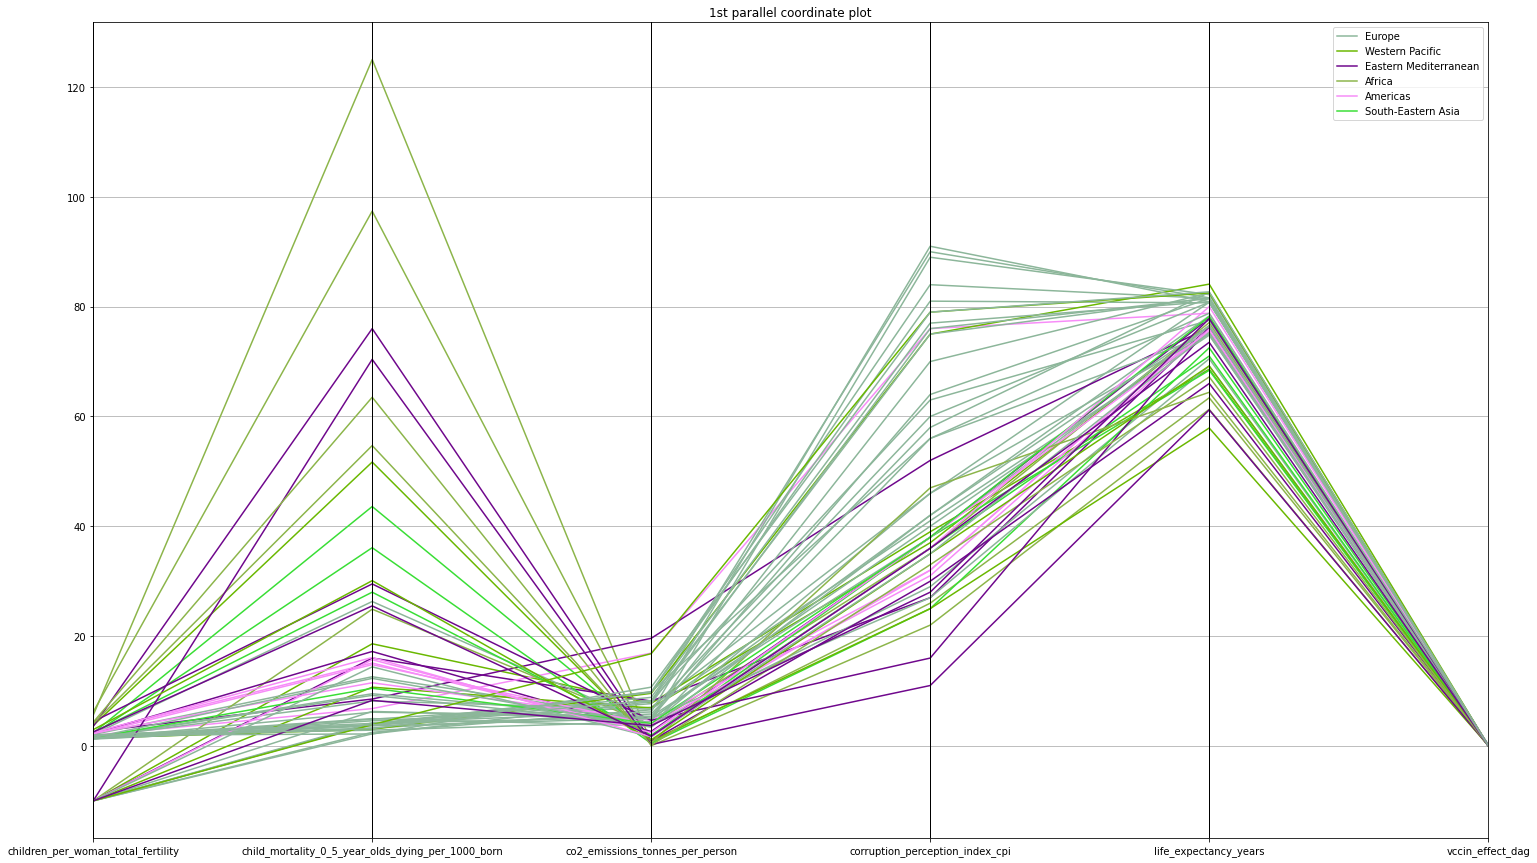

In [16]:
# First parallel coordinate plot
plt.figure(figsize=(25, 15))
plt.title("1st parallel coordinate plot")
pd.plotting.parallel_coordinates(dataPrepViz_sampled, 'geographic_group')
plt.show()

In [17]:
# normalize all numerical attributes
# creating the scaler
min_max_scaler = preprocessing.MinMaxScaler() 
# fitting the scaler to the data
min_max_scaler.fit(dataPrepViz_sampled.drop(columns="geographic_group"))
# transforming the data to the defined new range
transformed_data = min_max_scaler.transform(dataPrepViz_sampled.drop(columns="geographic_group"))
# replace the original data with normalized data
dataPrepViz_sampled.loc[:, 'children_per_woman_total_fertility':'vccin_effect_dag'] = transformed_data
dataPrepViz_sampled.head(10)

geographic_group  children_per_woman_total_fertility  \
49                  Europe                            0.699443   
85         Western Pacific                            0.000000   
58   Eastern Mediterranean                            0.000000   
96                  Africa                            0.964131   
36                Americas                            0.773655   
134               Americas                            0.737786   
110  Eastern Mediterranean                            0.777984   
27                  Africa                            1.000000   
92                  Europe                            0.000000   
128                 Europe                            0.746444   

     child_mortality_0_5_year_olds_dying_per_1000_born  \
49                                            0.019541   
85                                            0.133692   
58                                            0.112522   
96                                            1.000000   
36                                            0.105195   
134                                           0.037616   
110                                           0.051783   
27                                            0.775281   
92                                            0.015063   
128                                           0.084840   

     co2_emissions_tonnes_per_person  corruption_perception_index_cpi  \
49                          0.357982                           0.4375   
85                          0.394785                           0.3500   
58                          0.415743                           0.2000   
96                          0.030174                           0.1875   
36                          0.132559                           0.2625   
134                         0.861986                           0.8125   
110                         1.000000                           0.5125   
27                          0.000000                           0.1375   
92                          0.500596                           0.9125   
128                         0.246548                           0.3875   

     life_expectancy_years  vccin_effect_dag  
49                0.874046          0.650000  
85                0.408397          0.253846  
58                0.709924          0.323077  
96                0.209924          0.434615  
36                0.713740          0.080769  
134               0.797710          0.369231  
110               0.698473          0.092308  
27                0.129771          0.338462  
92                0.900763          0.257692  
128               0.778626          0.319231

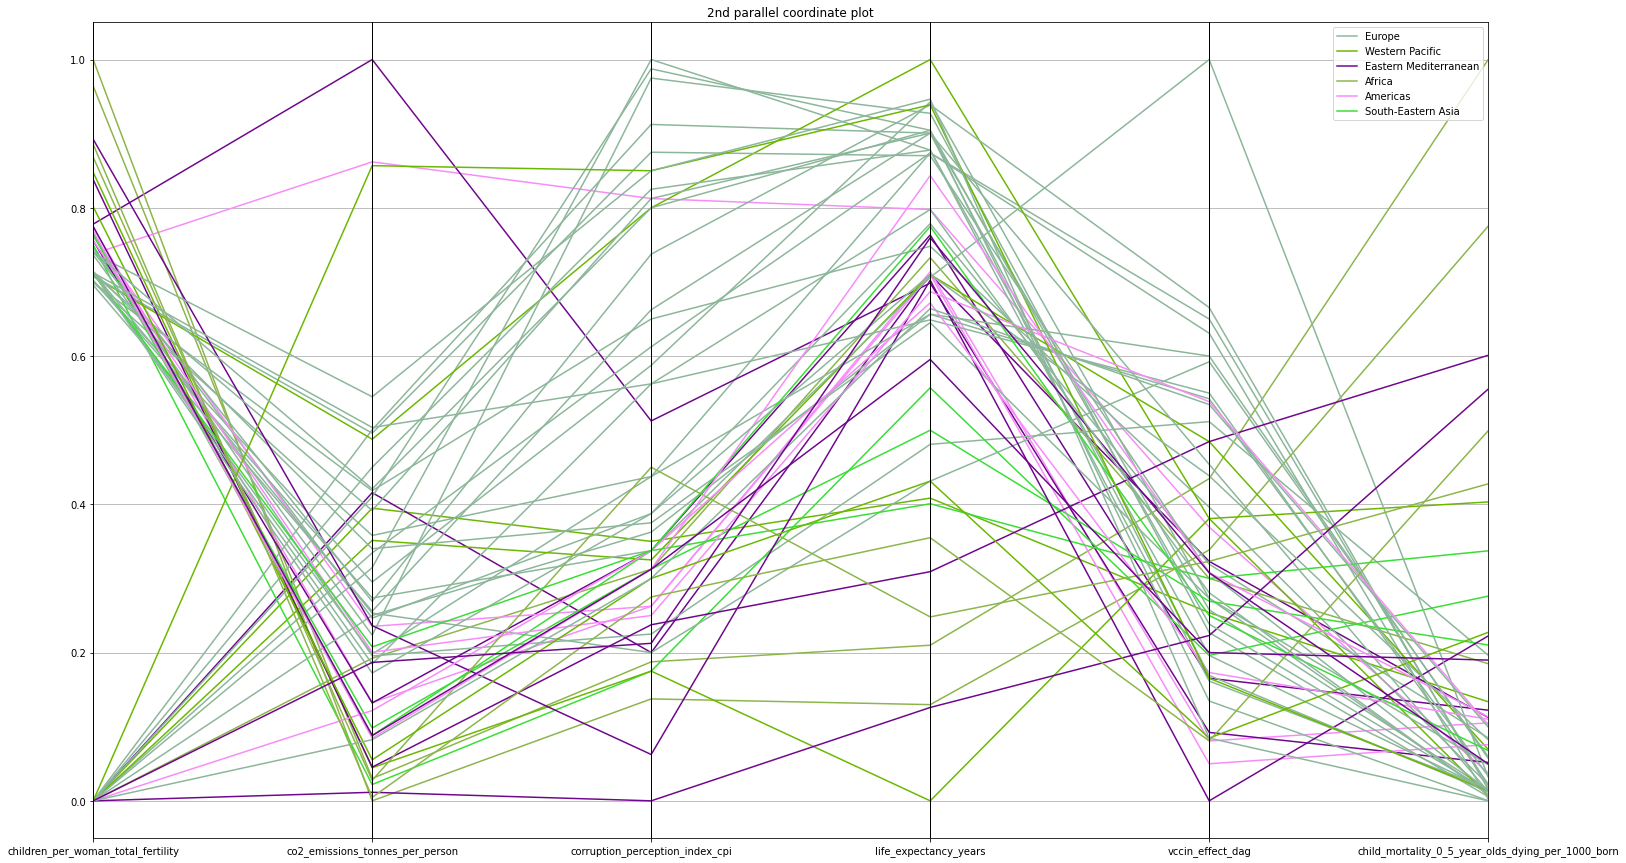

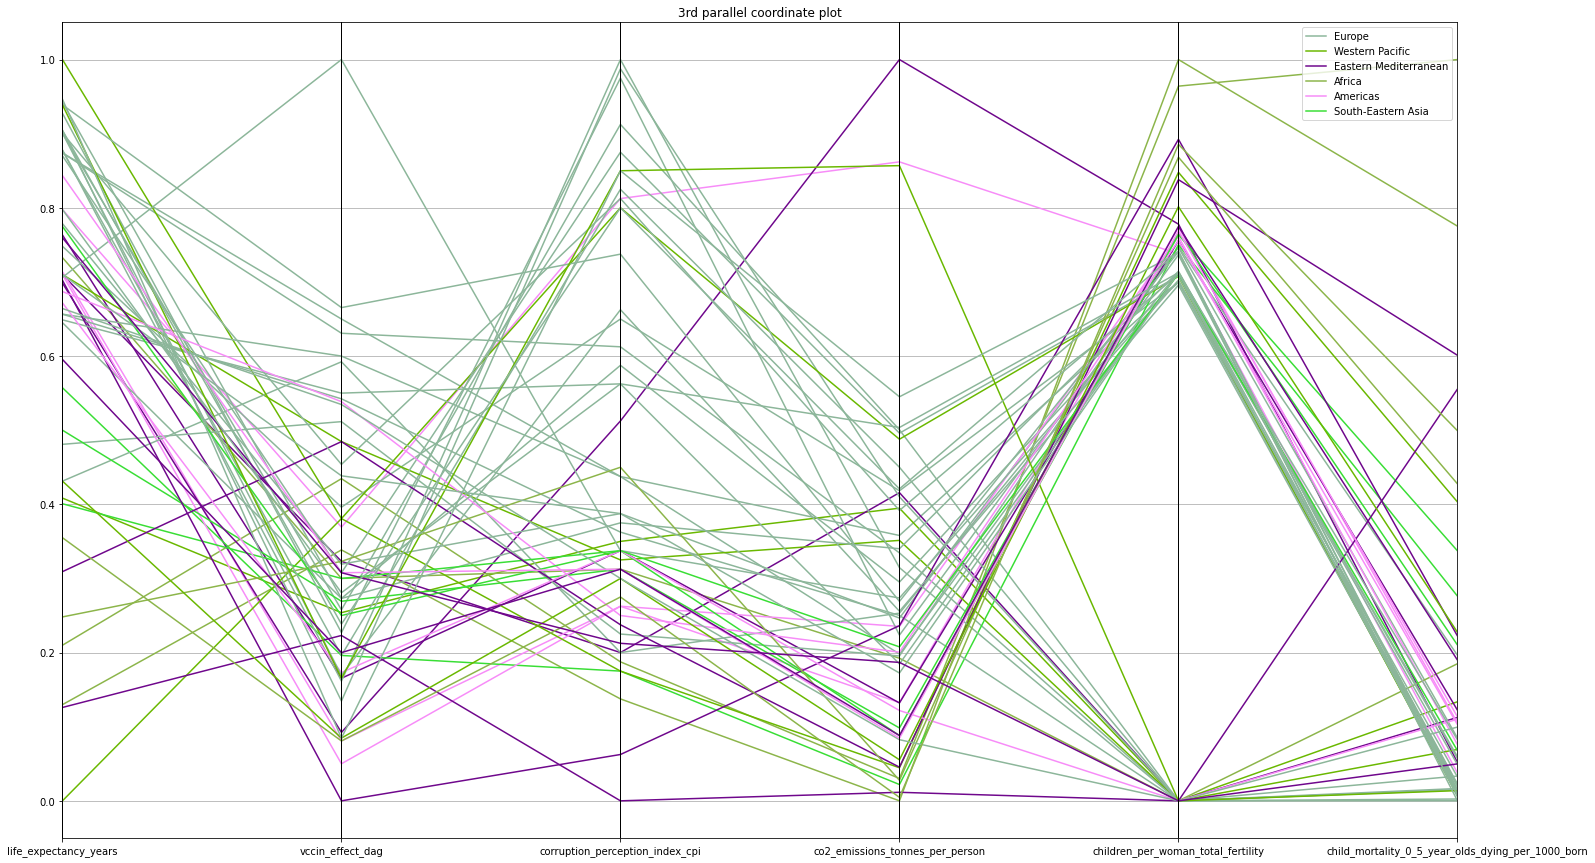

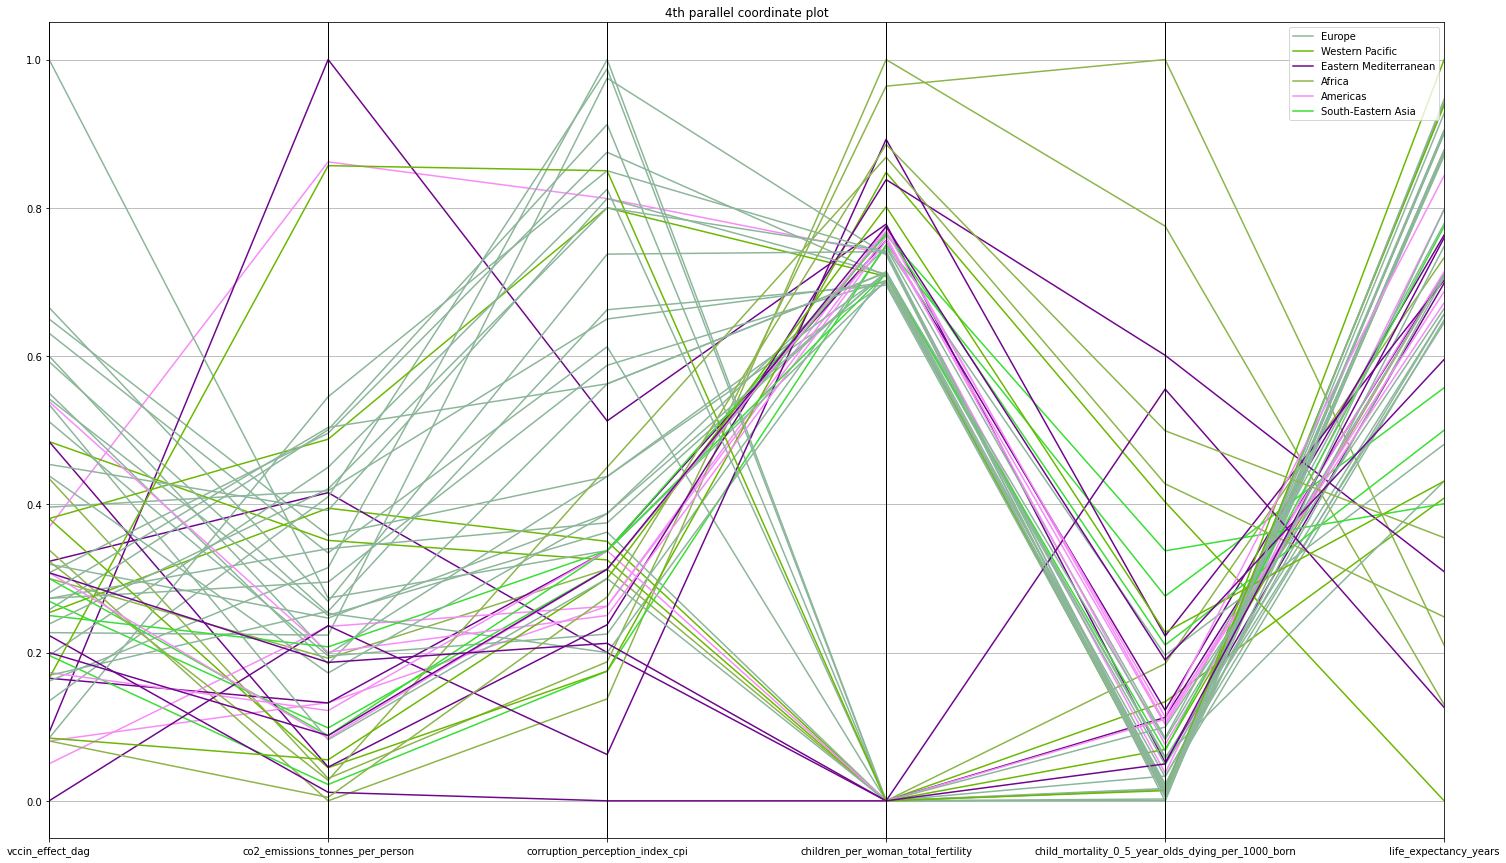

In [18]:
# the remaining 3 parallel coordinate plots

# Second parallel coordinate plot
plt.figure(figsize=(25, 15))
plt.title("2nd parallel coordinate plot")
pd.plotting.parallel_coordinates(dataPrepViz_sampled, 'geographic_group', cols=['children_per_woman_total_fertility', 'co2_emissions_tonnes_per_person', 'corruption_perception_index_cpi',
                                                                                'life_expectancy_years', 'vccin_effect_dag', 'child_mortality_0_5_year_olds_dying_per_1000_born'])
plt.show()

# Third parallel coordinate plot
plt.figure(figsize=(25, 15))
plt.title("3rd parallel coordinate plot")
pd.plotting.parallel_coordinates(dataPrepViz_sampled, 'geographic_group', cols=['life_expectancy_years', 'vccin_effect_dag',
                                                                                'corruption_perception_index_cpi', 'co2_emissions_tonnes_per_person', 'children_per_woman_total_fertility', 'child_mortality_0_5_year_olds_dying_per_1000_born'])
plt.show()

# Fourth parallel coordinate plot
plt.figure(figsize=(25, 15))
plt.title("4th parallel coordinate plot")
pd.plotting.parallel_coordinates(dataPrepViz_sampled, 'geographic_group', cols=['vccin_effect_dag', 'co2_emissions_tonnes_per_person',
                                                                                'corruption_perception_index_cpi', 'children_per_woman_total_fertility', 'child_mortality_0_5_year_olds_dying_per_1000_born', 'life_expectancy_years'])
plt.show()

(c) For each of the questions 1-3 below:
- Indicate all of your parallel coordinate plots, which are suitable for finding an answer to the question. Explain your selection. 
- If possible, briefly answer the questions.

    1) Is there a correlation between fertility and CO2 emissions? If yes, is it positive or negative?

    2) Is there a correlation between life expectancy and vaccination confidence? If yes, is it positive or negative?

    3) Is there a correlation between CO2 emissions and perceived corruption? If yes, is it positive or negative?

Explanation: 
The first plot after normalizing is suitable for finding all the answer to the questions. There are 5 parts in the graph.

A good positive correlation should look like parallel horizontal lines (or not horizontal but no crossing), a good negative correlation should look like a "X" with every line passing through the center of the graph.

    (1) Lines in the 1st part indicate a weak negative correlation between fertility and CO2 emissions because the lines are crossing, almost forming a shape like "X" but not explicit (the crossing point is near the bottom of the graph).
    (2) Lines in the 4th part indicate no correlation between life expectancy and vaccination confidence because the lines are random. 
    (3) Lines in the 2nd part indicate a weak positive correlation between CO2 emissions and perceived corruption. Most lines are ascending with fewer crossings.

(d) In this subtask we prepare the data for the heat map, which we create in subtask (e). 

The heat map should visualize the vaccination confidence ('vccin_effect_dag') for different combinations of CO2 emissions ('co2_emissions_tonnes_per_person') and fertility ('children_per_woman_total_fertility'). The heatmap should have 40 columns and 40 rows. The shown vaccination confidence value should be the *median* of all values for each combination of CO2 emissions and fertility. 

Do the following steps in preparation:

    1) First, drop all columns that are not needed in this task.

    2) Discretize the CO2 emissions and fertility data into 40 bins each, using equal-width binning.

    3) Group the data by CO2 emissions and fertility, using median to aggregate the values.

In [19]:
# 1) First, drop all columns that are not needed in this task.
data_for_heatmap = dataPrepViz_sampled[[
    'vccin_effect_dag', 'co2_emissions_tonnes_per_person', 'children_per_woman_total_fertility']]

# 2) Discretize the CO2 emissions and fertility data into 40 bins each, using equal-width binning.
data_for_heatmap.loc[:, 'co2_emissions_tonnes_per_person'] = pd.cut(
    data_for_heatmap['co2_emissions_tonnes_per_person'], bins=40)
data_for_heatmap.loc[:, 'children_per_woman_total_fertility'] = pd.cut(
    data_for_heatmap['children_per_woman_total_fertility'], bins=40)

# 3) Group the data by CO2 emissions and fertility, using median to aggregate the values.
data_for_heatmap = data_for_heatmap.groupby(['co2_emissions_tonnes_per_person', 'children_per_woman_total_fertility']).median()

# We unstack the dataframe and fill empty with np.nan
data_for_heatmap = data_for_heatmap.unstack()

# Because grouped_dataPrepViz_sampled have multi-level column index, we need to drop one level
data_for_heatmap.columns = data_for_heatmap.columns.droplevel()

/opt/homebrew/anaconda3/envs/ds/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/homebrew/anaconda3/envs/ds/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(e) Use the modified data to create a heat map as specified in part (d). Answer the following questions based on that heat map and briefly explain how you derived your answer:

    1) Which combination of bins results in the highest vaccination confidence? 
    
    2) How do you explain empty fields in your heat map?
    
    3) Can you identify any pattern in the heat map, e.g. in the coloring or in the distribution of empty fields? What can be a possible reason for this?

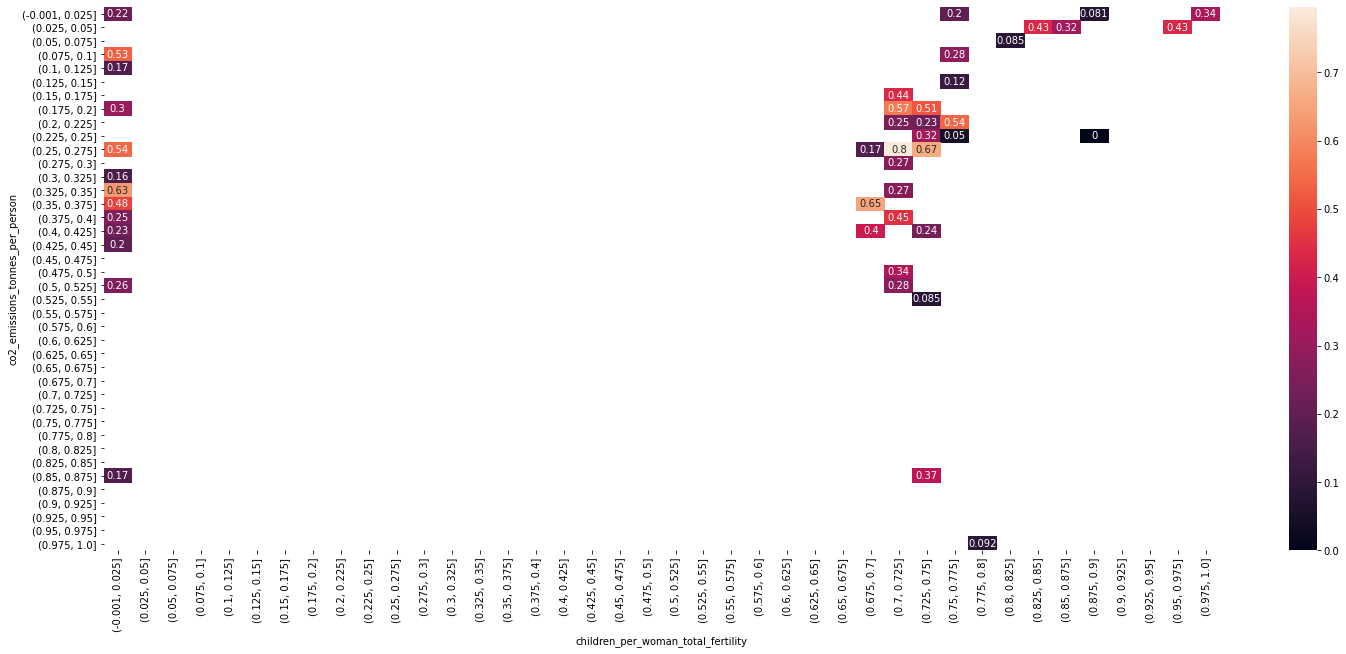

In [20]:
# Create a heat map
plt.figure(figsize=(25, 10))
sns.heatmap(data_for_heatmap, annot=True)
plt.show()

Explanation: 

    1) Which combination of bins results in the highest vaccination confidence? 
       CO2 emissions: (2.25, 0.275], Fertility: (0.125, 0.15]

    2) How do you explain empty fields in your heat map?
       There are no 'vccin_effect_dag' entries for these combination of bins.

    3) Can you identify any pattern in the heat map, e.g. in the coloring or in the distribution of empty fields? What can be a possible reason for this?
       This indicates that countries with relatively low co2 emissions and low fertility tend to have a stronger belief in the effect and importance of vaccination. 
<span class="burk">???</span>

## Question 3 - Frequent Item Sets and Association Rules (15 points)

(a) Carry out some preprocessing steps before starting the analysis:
 - Select 90% of the <b>store_data</b> dataset by random sampling. Use the matriculation number of one of the group members as seed.
 - After completing this preprocessing step, export your final dataset as <b>store_data_2.csv</b> dataset and use it for the next steps of the assignment.
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your results in Moodle.

In [21]:
# store the DataFrame object into the variable "store_data", we do not need to set the header
store_data = pd.read_csv('Datasets/store_data.csv', header=None)

# setting the seed for the Random State
random_state = np.random.seed(seed=123456)
# return a fraction of 90% percent of the data into "store_data_2"
store_data_2 = store_data.sample(frac=0.9, random_state=random_state)

# export final dataset as store_data_2.csv dataset
store_data_2.to_csv('Datasets/store_data_2.csv', index=False, header=None)

store_data_2.head()

0             1              2              3   \
5441     turkey       burgers    ground beef      spaghetti   
2715        oil           NaN            NaN            NaN   
3200  spaghetti           NaN            NaN            NaN   
3561  black tea  french fries      champagne            NaN   
5470     turkey           ham  grated cheese  herb & pepper   

                     4          5              6               7         8   \
5441               milk     butter          honey  cottage cheese  pancakes   
2715                NaN        NaN            NaN             NaN       NaN   
3200                NaN        NaN            NaN             NaN       NaN   
3561                NaN        NaN            NaN             NaN       NaN   
5470  whole wheat pasta  spaghetti  mineral water        pancakes  pet food   

                9           10   11   12   13   14   15   16   17   18   19  
5441  energy drink  light mayo  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2715           NaN         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3200           NaN         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3561           NaN         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5470     green tea         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

(b) Find the most frequent itemsets with the support of more than 0.04 using the Apriori algorithm.

In [22]:
# Read data from file Repair.csv
store_data_2 = []
with open('Datasets/store_data_2.csv') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        store_data_2.append(row)

# use TransactionEncoder module to convert an array to DataFrame
te = TransactionEncoder()
te_ary = te.fit(store_data_2).transform(store_data_2)

# np.nan was saved as empty string in part a), so we need to drop the columns ''
store_data_2 = pd.DataFrame(te_ary, columns=te.columns_).drop(columns=[''])
# store_data_2

# use Apriori algorithm from mlxtend
frequent_itemsets = apriori(store_data_2, min_support=0.04, use_colnames=True)
frequent_itemsets.head(10)

support        itemsets
0  0.084284       (burgers)
1  0.080433          (cake)
2  0.046808     (champagne)
3  0.060584       (chicken)
4  0.166049     (chocolate)
5  0.078063       (cookies)
6  0.049770   (cooking oil)
7  0.180714          (eggs)
8  0.079544      (escalope)
9  0.170197  (french fries)

(c) Find the most frequent itemsets with more than 1 member and a support of more than 0.04 using the Apriori algorithm.

In [23]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets_filtered = frequent_itemsets.loc[frequent_itemsets['length'] > 1]   
frequent_itemsets_filtered

support                      itemsets  length
30  0.053918    (chocolate, mineral water)       2
31  0.051844         (eggs, mineral water)       2
32  0.042216  (mineral water, ground beef)       2
33  0.049474         (mineral water, milk)       2
34  0.060287    (mineral water, spaghetti)       2

(d) Find the itemsets having min_confidence=0.3 and min_lift=1.2. Print support, confidence, and lift of the filtered rules in one table. How do you interpret the quality of the discovered rules?

In [24]:
# Mine association rules from the discovered frequent itemsets stored in variable 'frequent_itemsets', set minimum confidence to 0.3.
# Store the discovered rules in variable 'rules_association'.
rules_association = arule(frequent_itemsets, metric ='confidence', min_threshold=0.3)

# Filter out the rules with lift larger than 1.2, store the discovered rules in variable 'filtered_rules'.
filtered_rules = rules_association.loc[rules_association['lift'] > 1.2]     

# Show the columns 'antecedents', 'consequents', 'support', 'confidence' and 'lift' of variable 'filtered_rules' 
filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

antecedents      consequents   support  confidence      lift
0    (chocolate)  (mineral water)  0.053918    0.324710  1.348166
1  (ground beef)  (mineral water)  0.042216    0.426009  1.768749
2         (milk)  (mineral water)  0.049474    0.375281  1.558131
3    (spaghetti)  (mineral water)  0.060287    0.344915  1.432056

Explanation:

Support: Support is an indication of how frequently the itemset appears in the dataset.

Confidence: The confidence value of a rule, $X\Rightarrow Y$, is the proportion of the transactions that contains X which also contains Y. Confidence is an indication of how often the rule has been found to be true.

Lift: The Lift tells us how much better a rule is at predicting the result than just assuming the result in the first place. When the value is greater than 1, greater lift values indicate stronger positive correlation.

<span class="burk">???</span>

(e) Apply the FP-Growth algorithm for all the settings of b, c, and d.

In [25]:
print('b) Find the most frequent itemsets with the support of more than 0.04 using the FP-Growth algorithm: ')
frequent_itemsets = fpgrowth(store_data_2, min_support=0.04, use_colnames=True)
print(frequent_itemsets)
print('\nc) Find the most frequent itemsets with more than 1 member and a support of more than 0.04: ')
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets_filtered = frequent_itemsets.loc[frequent_itemsets['length'] > 1]
print(frequent_itemsets_filtered)
print("\nd) Find the itemsets having min_confidence=0.3 and min_lift=1.2: ")
rules_association = arule(frequent_itemsets, metric="confidence", min_threshold=0.3)
filtered_rules = rules_association.loc[rules_association['lift'] > 1.2]  
print(filtered_rules)

b) Find the most frequent itemsets with the support of more than 0.04 using the FP-Growth algorithm: 
     support                      itemsets
0   0.174789                   (spaghetti)
1   0.131832                        (milk)
2   0.099096                 (ground beef)
3   0.095838                    (pancakes)
4   0.084284                     (burgers)
5   0.062065                      (turkey)
6   0.047549                       (honey)
7   0.170197                (french fries)
8   0.046808                   (champagne)
9   0.240853               (mineral water)
10  0.132721                   (green tea)
11  0.052881               (grated cheese)
12  0.050215               (herb & pepper)
13  0.060584                     (chicken)
14  0.080433                        (cake)
15  0.078063                     (cookies)
16  0.166049                   (chocolate)
17  0.094505           (frozen vegetables)
18  0.077914              (low fat yogurt)
19  0.180714                        (e

## Question 4 - Text Mining (15 points): 

In this question, we use <b>sms_data.csv</b>. 

In [26]:
sms_data = pd.read_csv('Datasets/sms_data.csv', sep=';', encoding='latin1')
sms_data.head(10)

Label                                               Text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...

a) Load the dataset and create the <b>sampled_data</b> dataset which includes 90% of the data. Use the matriculation number of one of the group members as seed. Export the sampled dataset. Split the sampled data into training (80%) and test (20%) data preserving the distribution based on "Label".

<font color='red'>Important!</font> Make sure that you submit your extracted dataset with your results in Moodle.

In [27]:
# setting the seed for the Random State
random_state = np.random.seed(seed=123456)
# return a fraction of 90% percent of the data into "dataPrepViz_sampled"
sampled_data = sms_data.sample(frac=0.9, random_state=random_state)

text = sampled_data['Text']
label = sampled_data['Label']
train_text, test_text, train_label, test_label = train_test_split(
    text, label, test_size=0.2, stratify=label)

### Classification

In the following tasks, train each of the specified models with the training data and give for each the accuracy on the training data.

(b) Model based on the binary document-term matrix

Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, and stopword removal) and obtain a binary document-term matrix. Train a logistic classifier with the 'Label' as target feature.

In [28]:
stoplist = set(stopwords.words('english'))
stemmer = SnowballStemmer('english', ignore_stopwords=True)

#function to do preprocessing
def Corpus_Preprocessing(data):
    #all lowercas
    data = data.str.lower()
    #no punctuation
    data = data.str.replace('[{}]'.format(string.punctuation), '')
    #tokenization
    data = data.apply(word_tokenize)
    #stemming    
    data = data.apply(lambda x : [stemmer.stem(i) for i in x])
    #stopword removal
    data = data.apply(lambda x : [i for i in x if i not in stoplist]) 
    return data

# Perform preprocessing on the training corpus
train_text = Corpus_Preprocessing(train_text)
train_text = train_text.apply(lambda x : ' '.join(x))

In [29]:
# obtain a binary document-term matrix
vectorizer = CountVectorizer(binary=True)
train_text_counts = vectorizer.fit_transform(train_text)
pd.DataFrame(data=train_text_counts.toarray(),
             columns=vectorizer.get_feature_names()).head(10)

008704050406  0089mi  0121  01223585236  01223585334  0125698789  02  \
0             0       0     0            0            0           0   0   
1             0       0     0            0            0           0   0   
2             0       0     0            0            0           0   0   
3             0       0     0            0            0           0   0   
4             0       0     0            0            0           0   0   
5             0       0     0            0            0           0   0   
6             0       0     0            0            0           0   0   
7             0       0     0            0            0           0   0   
8             0       0     0            0            0           0   0   
9             0       0     0            0            0           0   0   

   020603  0207  02070836089  ...  zealand  zebra  zed  zero  zindgi  zoe  \
0       0     0            0  ...        0      0    0     0       0    0   
1       0     0            0  ...        0      0    0     0       0    0   
2       0     0            0  ...        0      0    0     0       0    0   
3       0     0            0  ...        0      0    0     0       0    0   
4       0     0            0  ...        0      0    0     0       0    0   
5       0     0            0  ...        0      0    0     0       0    0   
6       0     0            0  ...        0      0    0     0       0    0   
7       0     0            0  ...        0      0    0     0       0    0   
8       0     0            0  ...        0      0    0     0       0    0   
9       0     0            0  ...        0      0    0     0       0    0   

   zogtorius  zoom  zyada  üll  
0          0     0      0    0  
1          0     0      0    0  
2          0     0      0    0  
3          0     0      0    0  
4          0     0      0    0  
5          0     0      0    0  
6          0     0      0    0  
7          0     0      0    0  
8          0     0      0    0  
9          0     0      0    0  

[10 rows x 6632 columns]

In [30]:
# Train a logistic classifier with the 'Label' as target feature
text_clf_binary_dt = Pipeline([('vect', vectorizer),
                               ('logistic', LogisticRegression(solver='lbfgs', multi_class='auto'))])
text_clf_binary_dt = text_clf_binary_dt.fit(train_text, train_label)

(c) Model based on doc2vec

- Perform preprocessing on the training corpus (all lowercase, no punctuation, tokenization, stemming, and stopword removal). 
- Obtain a doc2vec embedding in order to reduce the dimension of the document vector. Explain which vector size you use and why.
- Use the doc2vec model you just trained to convert the training set to a set of document vectors.
- Train a logistic classifier with 'Label' as target feature.

In [31]:
# Preprocssing
# Creating lists of TaggedDocument objects
train_text_tagged = []
for i in range(0, len(train_text)):
    train_text_tagged.append(gensim.models.doc2vec.TaggedDocument(words=gensim.utils.simple_preprocess(
        train_text.iloc[i]), tags=[train_label.iloc[i]]))

# In order to speed up the calculations, let's fetch the number of cores the machine has
cores = multiprocessing.cpu_count()

# Creating a vocabulary
doc2vec_model = Doc2Vec(dm=0, vector_size=20, workers=cores)
doc2vec_model.build_vocab([x for x in tqdm(train_text_tagged)])

# Training the doc2vec model
for epoch in range(30):
    doc2vec_model.train(utils.shuffle([x for x in tqdm(
        train_text_tagged)]), total_examples=len(train_text_tagged), epochs=1)
    doc2vec_model.alpha -= 0.002
    doc2vec_model.min_alpha = doc2vec_model.alpha

# Building the feature vector for the classifier
def vec_for_learning(model, docs):
    doc2vec_vectors = [model.infer_vector(doc.words) for doc in docs]
    targets = [doc.tags[0] for doc in docs]
    return doc2vec_vectors, targets

# Translating docs into vectors for training set
train_text_doc2vec, train_label_doc2vec = vec_for_learning(doc2vec_model, train_text_tagged)

# Training a classification model, we set C to 1e5 for regularition to prevent it from overfitting.
text_clf_doc2vec = LogisticRegression(n_jobs=cores, C=1e5)
text_clf_doc2vec.fit(train_text_doc2vec, train_label_doc2vec)

100%|██████████| 4012/4012 [00:00<00:00, 4415520.24it/s]


LogisticRegression(C=100000.0, n_jobs=8)

In [32]:
print("Accuracy on training set: " +
      str(text_clf_doc2vec.score(train_text_doc2vec, train_label_doc2vec)))

Accuracy on training set: 0.9204885343968096


Explanation:

If the vector size is too small, we cannot present differences of some close docs; If the vector size is too big, it might lead to overfitting.

By testing, we found that the accuracy for training data is 92% when we set the vector size to 20, and the accuracy would not be obviously improved if we use a larger size. If we put this value too large, it might lead to overfitting, so we use 20.

### Evaluation
For the following tasks, use the test data.

(d) Predict the classification with the two models on the test data. Preprocess the data if necessary.

In [33]:
# Model based on the binary document-term matrix
# Preprocessing
test_text = Corpus_Preprocessing(test_text)
test_text = test_text.apply(lambda x : ' '.join(x))

# Predict
test_pred = text_clf_binary_dt.predict(test_text)

In [34]:
# Model based on doc2vec
# Preprocessing
# Creating lists of TaggedDocument objects
test_text_tagged = []
for i in range(0, len(test_text)):
    test_text_tagged.append(gensim.models.doc2vec.TaggedDocument(words=gensim.utils.simple_preprocess(
        test_text.iloc[i]), tags=[test_label.iloc[i]]))
# Translating docs into vectors for test set
test_text_doc2vec, test_label_doc2vec = vec_for_learning(doc2vec_model, test_text_tagged)

# Predict
test_pred_doc2vec = text_clf_doc2vec.predict(test_text_doc2vec)

Explanation:



(e) Obtain the confusion matrices for the two models and the prediction on the test data.

In [35]:
# Confusion matrix for model based on the binary document-term matrix
print("Confusion matrix for model based on the binary document-term matrix")
print(confusion_matrix(y_true=test_label, y_pred=test_pred))

# Confusion matrix for model based on doc2vec
print("Confusion matrix for model based on doc2vec")
print(confusion_matrix(y_true=test_label_doc2vec, y_pred=test_pred_doc2vec))

Confusion matrix for model based on the binary document-term matrix
[[868   0]
 [ 16 119]]
Confusion matrix for model based on doc2vec
[[845  23]
 [ 69  66]]


(f) Obtain accuracy and F1-score for the prediction of the two different models on the test data.

In [36]:
print("------------------ Accuracy ------------------")
print("Model based on the binary document-term matrix:")
print(accuracy_score(y_true=test_label, y_pred=test_pred))

print("\nModel based on doc2vec:")
print(accuracy_score(y_true=test_label_doc2vec, y_pred=test_pred_doc2vec))


print("\n\n------------------ F1-score -------------------")
print("Model based on the binary document-term matrix:")
print(f1_score(y_true=test_label, y_pred=test_pred, pos_label='ham'))

print("\nModel based on doc2vec:")
print(f1_score(y_true=test_label_doc2vec, y_pred=test_pred_doc2vec, pos_label='ham'))

------------------ Accuracy ------------------
Model based on the binary document-term matrix:
0.9840478564307079

Model based on doc2vec:
0.9082751744765702


------------------ F1-score -------------------
Model based on the binary document-term matrix:
0.9908675799086757

Model based on doc2vec:
0.9483726150392816


(g) Briefly comment on the quality of the two models. Interpret the results retrieved in the evaluation part.

Explanation:

Compared to the accuracy and F1-scores of these two models, we can conclude that the model based on the binary document-term matrix predict much better than the model based on doc2vec.

For model based on the binary document-term matrix, we use the binary Bag-of-Words (BoW) model as input, whose size is enormous. For the model based on doc2vec, we use an encoder-decoder structure for feature extraction, which reduces the input vector's length. That means the data would lose some features when generating the embeddings, which lead to a weak prediction. In case that the size of the vocabulary is enormous, model based on doc2vec allows to avoid the problem of the high sparseness of textual data, but it might lose accuracy.

### Language model

For the following tasks use the <b>sampled_data</b>.

(h) Create two lists, one for ham and one for spam, containing all messages.
For ham and spam separately, build a bigram language model using the initial dataset (before splitting to training and test data). Do not perform stemming nor stopword removal for this task, but apply other preprocessing steps, such as all to lowercase, no punctuation and tokenization. Use both right and left padding, and manage unknown terms by using a dedicated token.

In [37]:
# Preprocessing
ham = sampled_data[sampled_data['Label'] == 'ham']
spam = sampled_data[sampled_data['Label'] == 'spam']

# Function for preprocessing
def preprocessing(texts):
    res = []
    for text in texts:
        # split the text to sentence
        sents = sent_tokenize(text)
        for sent in sents:
            # lowercase
            sent = sent.lower()
            # no Punctuation
            sent = ''.join(w for w in sent if w not in string.punctuation)
            # tokenization
            sent = word_tokenize(sent)
            res.append(sent)
    return res

ham_sentences = preprocessing(ham.loc[:, 'Text'])
spam_sentences = preprocessing(spam.loc[:, 'Text'])

# Manage unknown terms by using a dedicated token
def manage_unknown(sentences, vocab):
    """
    fuction for replacing unknown terms by using a dedicated token
    
    :param sentences: a list of list of sentence
    :param vocab: class 'nltk.lm.vocabulary.Vocabulary' contains known terms
    """
    for sent in sentences:
        for i, word in enumerate(sent):
            if word not in vocab:
                sent[i] = '<UNK>'
    return sentences
# Words appear at least twice will be seen as known words
vocab_ham = Vocabulary([word for sent in ham_sentences for word in sent] , unk_cutoff=2)
ham_sentences = manage_unknown(ham_sentences, vocab_ham)
vocab_spam = Vocabulary([word for sent in spam_sentences for word in sent] , unk_cutoff=2)
spam_sentences = manage_unknown(spam_sentences, vocab_spam)

# Preprocess the tokenized text for bigrams language modelling
train_ham_2, ham_sentences_padded_2 = padded_everygram_pipeline(2, ham_sentences)
train_spam_2, ham_sentences_spadded_2 = padded_everygram_pipeline(2, spam_sentences)

# Train a bigrams model
bigrams_ham = MLE(2)
bigrams_ham.fit(train_ham_2, ham_sentences_padded_2)
bigrams_spam = MLE(2)
bigrams_spam.fit(train_spam_2, ham_sentences_spadded_2)

(i) For each message groups, use the correspondent language model from (h) to generate, using MLE, a sentence of fifteen words using the following terms as seed:
- 'hello'
- 'yes'
- 'but'

In [38]:
def generate_sent(model, num_words, text_seed, random_seed=0):
    """
    generate sentence based on a model

    :param model: An ngram language model from `nltk.lm.model`.
    :param num_words: Max number of words to generate.
    :param random_seed: Seed value for random.
    """
    content = []
    for token in model.generate(num_words, text_seed=text_seed, random_seed=random_seed):
        if token == '<s>' or token == '<UNK>':
            continue
        if token == '</s>':
            break
        content.append(token)
    # return after detokenizing
    return ' '.join(content)

In [39]:
print("----------------------- ham -----------------------")
print("hello " + str(generate_sent(bigrams_ham, 15, 'hello')))
print("yes " + str(generate_sent(bigrams_ham, 15, 'yes')))
print("but " + str(generate_sent(bigrams_ham, 15, 'but')))

print("\n---------------------- spam -----------------------")
print("hello " + str(generate_sent(bigrams_spam, 15, 'hello')))
print("yes " + str(generate_sent(bigrams_spam, 15, 'yes')))
print("but " + str(generate_sent(bigrams_spam, 15, 'but')))

----------------------- ham -----------------------
hello turns out for at home about this in it just trying to do you like
yes series means in already bought pie
but shirts and i din c me the day

---------------------- spam -----------------------
hello six downloads for a new mobiles vary
yes pobox334 stockport sk38xh cost£150pm max10mins
but foley won a free entry in the claims everyone driving


(j) Build a trigram model with the same data as in the previous task. Use both right and left padding, and manage unknown terms by using a dedicated token.

In [40]:
# Preprocess the tokenized text for bigrams language modelling
train_ham_3, ham_sentences_padded_3 = padded_everygram_pipeline(3, ham_sentences)
train_spam_3, spam_sentences_padded_3 = padded_everygram_pipeline(3, spam_sentences)

# Train a trigrams model
trigrams_ham = MLE(3)
trigrams_ham.fit(train_ham_3, ham_sentences_padded_3)
trigrams_spam = MLE(3)
trigrams_spam.fit(train_spam_3, spam_sentences_padded_3)

(k) For each message group (ham and spam), use the correspondent language model from the previous qustion to generate, using MLE, a sentence of fifteen words using the following terms as seed:
- 'hello'
- 'yes'
- 'but'

In [41]:
print("----------------------- ham -----------------------")
print("hello " + str(generate_sent(trigrams_ham, 15, 'hello')))
print("yes " + str(generate_sent(trigrams_ham, 15, 'yes')))
print("but " + str(generate_sent(trigrams_ham, 15, 'but')))

print("\n---------------------- spam -----------------------")
print("hello " + str(generate_sent(trigrams_spam, 15, 'hello')))
print("yes " + str(generate_sent(trigrams_spam, 15, 'yes')))
print("but " + str(generate_sent(trigrams_spam, 15, 'but')))

----------------------- ham -----------------------
hello turns out i had come cant wait till i come tomorrow
yes series good
but shirts care

---------------------- spam -----------------------
hello play
yes pobox334 stockport sk38xh cost£150pm max10mins
but foley won an ipod


(l) Compare the quality of the generated text. Which model performs better? In general, which differences are there in using trigrams as opposed to bigrams?

Explanation: 

Theoretically, the Trigrams model is better than the bigrams model, as it carries more information about the context. Prediction from the trigrams model would care more about context so that it will show stronger consistency.  Because our data set contains many wrong spelt words, incomplete sentences and informal expression, so the predictions of both model are not so good. 

## Question 5 - Process Mining (15 points): 

### General investigation

a) Import the event log from the <b>Quarantine_Log</b> csv file. Set the case ID to 'patient', Timestamp to 'timestamp' and Activity as 'activity'. Also, set the lifecyle column to the right attribute. Furthermore, identify the case attributes and set them to case attributes. Find the correct setting, so that the resource is understood as resource (compare with the documentation). Give some basic information:

    - number of cases
    - number of variants
    - number of events
    - the trace and event attribute names
    - the number of resources
    - the earliest timestamp and the latest timestamp

In [42]:
# your code

### Sampling the event log
(b) Create a sample of the event log (<b>log_sampled</b>) containing 80% of the traces. Export the sampled event log.

<font color='red'>Important!</font> Make sure that you submit your extracted event log with your results in Moodle.

In [43]:
# your code

### Trace frequency
(c) Use the sampled event log and print the least frequent and the most frequent variant and the corresponding counts. Is there already some indication about the model structure (e.g. loops, parallel, etc.)?

In [44]:
# your code

Explanation: 

### Filter event logs
(d) Create three different event logs:

1. One event log containing only the 10% of the most frequent traces (**filtered_log_variants**).
2. One event log containing only patients with private insurance (**filtered_log_insurance**).
3. One event log containing only patients having the event attribute type as 'cloud' (**filtered_log_cloud**).

In [45]:
# your code

### Discovery and conformance checking

(e) Use the Inductive Miner to discover a process model (Process tree or Petri net) for each event log created in (d). For one of the models - you may choose - explain shortly the behaviour of the model. (e.g. loops, sequences)

In [46]:
# your code

Explanation:

(f) Briefly summarize the differences and similarities of the models. Why do they differ/are similar?

Explanation: 


(g) Perform the token-based replay for conformance checking using your discovered model for **filtered_log_variants** and the original event log. Does your process model fit the log? Explain the result in one sentence. Calculate the trace and log fitness.

In [47]:
# your code

Explanation: The model has a low fitness, because of the low number of traces used to create the model.

### Frequency and performance

(h) Visualize the model for the **filtered_log_variants** event log enriched with frequency information. Subsequently, visualize that same model enriched with performance information.

In [48]:
# your code

(i) What are frequent activities? Why may they be frequent (think about the real life process described by the log)? What are possibly problematic activities according to the performance?

Explanation: 

## Question 6 - Big Data (15 points): 

### Preparation: generating a simple log

In this question, we use the event log from the log csv file with the following modifications:
1. We flatten the lifecycles (i.e., start and complete) into a single event. Each event contains the start timestamp and complete timestamp.
2. A new column, called ServiceTime column, is included which represents the duration of the corresponding activity in the event.

We name the event log as **simple_log** in the remainder. Please follow the explanations below to prepare the **simple_log**. The preparation steps will not be graded.

In [49]:
# We use following utility functions for the modifications (these are given):
def _distinguish_duplicate_activities(log):
    """Add flags to the duplicate activities in a trace in order to distinguish them

    Keyword arguments:
    log -- even log
    """
    trace = list()
    activity_list = list()
    count=0
    prev_caseid=""
    for row in log.itertuples():
        activity=row.Activity
        caseid=row.Patient
        if(caseid!=prev_caseid):
            count=0
            prev_caseid=caseid
            trace=[]

        if activity in trace:
            count+=1
            activity = activity + "-{}".format(count)
            
        trace.append(activity)
        activity_list.append(activity)
    log["Activity"] = activity_list
    return log

def _merge_lifecylces(log):
    """Merge lifycycles (start,complete) into a single event. 

    Keyword arguments:
    log -- even log
    """
    start_log = log.loc[log["Lifecycle"]=="start"]
    start_log = _distinguish_duplicate_activities(start_log)
    
    complete_log = log.loc[log["Lifecycle"]=="complete"]
    complete_log = _distinguish_duplicate_activities(complete_log)

    complete_log["CompleteTime"] = complete_log["ModelTime"]
    simple_log = start_log.merge(complete_log, left_on=['Patient',"Activity"], right_on=['Patient',"Activity"],suffixes=("", "_y"))
    simple_log.drop(simple_log.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
    simple_log["ServiceTime"] = simple_log["CompleteTime"] - simple_log["ModelTime"]
    return simple_log

def produce_simple_log(filepath):
    """Produce simple log where the lifecycles are merged and service time information is added

    Keyword arguments:
    filepath -- path to event log
    """
    log = pd.read_csv(filepath, sep=',')
    log.sort_values(by=["Patient","ModelTime"],inplace=True)
    simple_log = _merge_lifecylces(log)
    return simple_log

**Preparation step 1**: Replace the filepath to your own filepath to produce the **simple_log**.  

In [50]:
import pandas as pd
#your filepath
filepath = "./Datasets/Quarantine_log.csv"
simple_log = produce_simple_log(filepath)

/opt/homebrew/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/homebrew/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Preparation: expanding the event log

In this question, we generate 100 event logs based on the <b>simple_log</b>. Each log replicates the base log (i.e., the <b>simple_log</b>). For randomization, you need to use the sum of the group's matriculation numbers (e.g., a group with 3 students having "100000", "100001", and "100002" as their matriculation numbers will use "300003" for the randomization).

In [51]:
# We use following utility functions for the modifications (these are given):
import random
def _randomize_case_attribute(log,matriculation_num):
    """Randomize case attributes based on the matriculation number

    Keyword arguments:
    log -- event log
    matriculation_num - sum of matriculation numbers
    """
    random.seed(matriculation_num)
    caseids = set(log["Patient"])
    for caseid in caseids:
        random_val = random.randint(-3,3)
        random.seed(random_val)
        log.loc[log["Patient"]==caseid,"Age"] = log.loc[log["Patient"]==caseid,"Age"]+random_val
    return log

def _extract_log(log,iter_num):
    """Extract n-th log to ./generated_logs/

    Keyword arguments:
    log -- event log
    iter_num -- n-th iteration
    """
    log.to_csv("./generated_logs/generated_log-{}.tsv".format(iter_num),header=False,index=False, sep="\t",line_terminator="")

def generate_log(original_log,num_replication,mat_num):
    """Generate logs (randomized by the matriculation number and extracted to ./generated_logs/) 

    Keyword arguments:
    log -- event log
    num_replication -- number of generated logs
    mat_num -- sum of matriculation numbers
    """
    import os
    dir_path = "./generated_logs"
    try:
        os.mkdir(dir_path)
    except OSError:
        print ("Directory already exists: %s" % dir_path)
    else:
        print ("Successfully created the directory %s " % dir_path)
    
    base_log = original_log.copy(deep=True)
    max_modeltime = max(base_log["ModelTime"])
    max_patientid = max(base_log["Patient"])
    for i in range(num_replication):
        generated_log = base_log
        generated_log["Patient"] += max_patientid
        generated_log["ModelTime"] += max_modeltime
        random.seed(None)
        randomized_log = _randomize_case_attribute(generated_log,random.randint(0,mat_num))
        _extract_log(randomized_log,i)
        print ("Successfully created %i th log at %s "% (i,dir_path))
        base_log = randomized_log

**Preparation step 2**: Generate 100 replicated logs in your local disk (./generated-logs/generated-log-0.tsv, ./generated-logs/generated-log-1.tsv, ..., ./generated-logs/generated-log-99.tsv). Do not forget to replace the SUM_MAT_NUM to yours.

In [52]:
#your group's sum
SUM_MAT_NUM = 154031 
base_log = simple_log[["Patient", "ModelTime","Activity","Age","ServiceTime"]] # this will be removed
NUM_REPITITION=1
generate_log(base_log,NUM_REPITITION,SUM_MAT_NUM)

Directory already exists: ./generated_logs
Successfully created 0 th log at ./generated_logs 


### Basic Hadoop

(a) Now, it's time to work with the Hadoop system. The goal of this task is to merge 100 event logs at your disk in the Hadoop system. Follow the instructions below and show your results in each step (screenshots of the command line). We use "letter identifier" for this task (The letter identifier is the string consisting of the first letters of the group memebers' first names, e.g., for the group with "Alessandro Berti", "Bernardo Silva", "Chiao Li", the indentifier is "ABC").

    1) Import the event logs to your Docker engine (at /usr/local/hadoop/(identifier)-generated-logs/).
    2) Upload the files to the running Hadoop system (at /input/(identifier)-generated-logs/). 
    3) Merge the file and copy the result back to the Hadoop system (at /input/(identifier)-final-log.tsv).
    4) Using the Hadoop command, print out the merged file in the command line (the screenshot may contain 10 rows).

In [53]:
#your code
from IPython.display import Image
Image(filename='your_path_to_screenshot_of_a1') 

ValueError: Cannot embed the 'your_path_to_screenshot_of_a1' image format

In [ ]:
#your code
Image(filename='your_path_to_screenshot_of_a2') 

In [ ]:
#your code
Image(filename='your_path_to_screenshot_of_a3') 

In [ ]:
#your code
Image(filename='your_path_to_screenshot_of_a4') 

### Process Discovery

(b) Discover a process model from the merged file using MapReduce algorithms. Explain how you discover the process model with the following deliverables:

    1) Mapper function (as python file(s))
    2) Reducer function (as python file(s))
    3) Hadoop commands for MapReduce calculation (as text file)
    4) Jupyter notebook code that prints the directly-follows relations and discover process models based on the directly-follows relations (you are free to use any discovery algorithms)

<font color='red'>Important!</font> Please note that in this task, your result will be evaluated based on whether they are reproducible from your explanation. If you skip MapReduce calculations for this task, you will get 0 points.The deliverables of 1), 2), and 3) should be submitted as outputs. 

In [ ]:
# your code for (b)-4

### Performance Analysis

(c) Calculate the total service time for each case using MapReduce algorithms. Explain how you calculate the total service time for each case with the following deliverables:

    1) Mapper function (as python file(s))
    2) Reducer function (as python file(s))
    3) Hadoop commands for MapReduce calculation (as text file)
    4) Result: total service times for cases (as text file)
    
Important! Please note that in this task, your result will be evaluated based on whether they are reproducible from your explanation. If you skip MapReduce calculations for this task, you will get 0 points.The deliverables of 1), 2), 3), and 4) should be submitted as outputs.

(d) Visualize 1000 cases with the longest total service time using any chart.

In [ ]:
# your code